<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Открываем-файл-с-данными-и-изучаем-общую-информацию." data-toc-modified-id="Открываем-файл-с-данными-и-изучаем-общую-информацию.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Открываем файл с данными и изучаем общую информацию.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Проведите-исследовательский-анализ-данных" data-toc-modified-id="Проведите-исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проведите исследовательский анализ данных</a></span></li><li><span><a href="#Составим-портрет-пользователя-каждого-региона" data-toc-modified-id="Составим-портрет-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Составим портрет пользователя каждого региона</a></span></li><li><span><a href="#Проверьте-гипотезы" data-toc-modified-id="Проверьте-гипотезы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверьте гипотезы</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование закономерностей определяющих успешность игры  

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Открываем файл с данными и изучаем общую информацию.

Импортируем все нужные библиотеки, посомтрим на первые 5 строк сета, изучи данные, вызовем метод info и посчитаем пропуски

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
# df.to_csv('games.csv', index=False)

In [4]:
# функция строит распределение по региону платформ, на вход получает два параметра
def region_plot(region, name='регионе'):
    sns.set_style("darkgrid")
    df_region.pivot_table(index='platform', values=region, aggfunc='sum').sort_values(
    by=region, ascending=False).iloc[:5].plot(kind='bar',color='steelblue',figsize=(15, 5), ec="darkgrey")
    plt.title(f'популярные платформы в {name}', fontsize = 15)
    plt.xlabel('название платформы', fontsize=12) 
    plt.ylabel('продажи (миллионы проданных копий)', fontsize=12)
    plt.show()
# функция строит распределение по региону жанров игры, на вход получает два параметра    
def genre_plot(region, name='регионе'):
    sns.set_style("darkgrid")
    df_region.pivot_table(index='genre', values=region, aggfunc='sum').sort_values(
    by=region, ascending=False).iloc[:5].plot(kind='bar',color='steelblue',figsize=(15, 5), ec="darkgrey")
    plt.title(f'популярные жанры игр в {name}', fontsize = 15)
    plt.xlabel('название платформы', fontsize=12) 
    plt.ylabel('продажи (миллионы проданных копий)', fontsize=12)
    plt.show()
# функция группирует по региону, возвращает сумму продаж и процент от общего
def region_table(region):
    t_table = df_region.pivot_table(index='platform', values=region, aggfunc='sum').sort_values(
        by=region, ascending=False).reset_index()
    t_table[region] = (t_table[region] / t_table[region].sum()) * 100
    return t_table  

In [5]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Приведем названия столбцов к нижнему регистру

In [6]:
df.columns = df.columns.str.lower()

**Описание данных**

`Name` — название игры  
`Platform` — платформа  
`Year_of_Release` — год выпуска  
`Genre` — жанр игры  
`NA_sales` — продажи в Северной Америке (миллионы проданных копий)  
`EU_sales` — продажи в Европе (миллионы проданных копий)  
`JP_sales` — продажи в Японии (миллионы проданных копий)  
`Other_sales` — продажи в других странах (миллионы проданных копий)  
`Critic_Score` — оценка критиков (максимум 100)  
`User_Score` — оценка пользователей (максимум 10)  
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [7]:
print('Количество уникальных значений в каждой колонке:')
for index in df.columns:
    row = df[index].nunique()
    print(f'Уникальных значений {index}: {row}')

Количество уникальных значений в каждой колонке:
Уникальных значений name: 11559
Уникальных значений platform: 31
Уникальных значений year_of_release: 37
Уникальных значений genre: 12
Уникальных значений na_sales: 402
Уникальных значений eu_sales: 307
Уникальных значений jp_sales: 244
Уникальных значений other_sales: 155
Уникальных значений critic_score: 82
Уникальных значений user_score: 96
Уникальных значений rating: 8


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
df.isna().agg(['sum', 'mean']).T

,sum,mean
name,2.0,0.000120
platform,0.0,0.000000
year_of_release,269.0,0.016093
genre,2.0,0.000120
na_sales,0.0,0.000000
eu_sales,0.0,0.000000
jp_sales,0.0,0.000000
other_sales,0.0,0.000000
critic_score,8578.0,0.513192
user_score,6701.0,0.400897


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
na_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
eu_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
jp_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
critic_score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [11]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [14]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [15]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [16]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Посмотрим на распределение продаж по регионам

In [17]:
print(f'Количество продаж(миллионы проданных копий) Северная Америка:{df["na_sales"].sum().round(0)}')
print(f'Количество продаж(миллионы проданных копий) Европа:{df["eu_sales"].sum().round(0)}')      
print(f'Количество продаж(миллионы проданных копий) Япония:{df["jp_sales"].sum().round(0)}')
print(f'Количество продаж(миллионы проданных копий) Другие:{df["other_sales"].sum().round(0)}')

Количество продаж(миллионы проданных копий) Северная Америка:4402.0
Количество продаж(миллионы проданных копий) Европа:2425.0
Количество продаж(миллионы проданных копий) Япония:1297.0
Количество продаж(миллионы проданных копий) Другие:791.0


**Вывод:** Дата фрейм небольшой, 11 колонок, почти 17000 строк. Можно сказать, что данные хорошие. Много пропусков в оценках критиков и пользователей, так же в рейтинге и год выпуска, эти данные нам нужны для исследования, удалять их не будем, подумаем как заполнить. Есть две строчки почти пустые, их удалим.

### Предобработка данных

In [18]:
df.duplicated().sum()

0

Явных дубликатов нет.  
Удалим две строчки, в них нет названия игры и жанра,  для исследования они нам будут не интересны.

In [19]:
df = df.dropna(subset=['name']).reset_index(drop=True) 

Пройдемся по порядку и подумаем, как можно заполнить пропуски

In [20]:
df.isna().agg(['sum','mean']).T

,sum,mean
name,0.0,0.000000
platform,0.0,0.000000
year_of_release,269.0,0.016095
genre,0.0,0.000000
na_sales,0.0,0.000000
eu_sales,0.0,0.000000
jp_sales,0.0,0.000000
other_sales,0.0,0.000000
critic_score,8576.0,0.513133
user_score,6699.0,0.400826


In [21]:
df[df['year_of_release'].isna()].sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9829,Godzilla: Destroy All Monsters Melee,XB,NaN,Fighting,0.09,0.03,0.0,0.00,71.0,6.8,T
8211,Teen Titans,GBA,NaN,Action,0.13,0.05,0.0,0.00,61.0,tbd,E10+
5888,NBA Live 2003,GC,NaN,Sports,0.23,0.06,0.0,0.01,82.0,8.2,E


In [22]:
df[df['critic_score'].isna()].sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2959,X-Men Origins: Wolverine - Uncaged Edition,X360,2009.0,Action,0.42,0.21,0.00,0.06,NaN,NaN,NaN
10311,The Penguins of Madagascar: Dr. Blowhole Retur...,X360,2011.0,Action,0.07,0.03,0.00,0.01,NaN,NaN,NaN
6692,Pro Yakyuu Team o Tsukurou!,SAT,1998.0,Sports,0.00,0.00,0.25,0.00,NaN,NaN,NaN


In [23]:
df[df['user_score'].isna()].sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5175,Yuu Yuu Hakusho,SNES,1993.0,Fighting,0.00,0.00,0.36,0.00,NaN,NaN,NaN
2188,Midway Presents Arcade's Greatest Hits: The At...,PS,1996.0,Misc,0.52,0.36,0.00,0.06,NaN,NaN,NaN
7297,Cabela's Big Game Hunter: Ultimate Challenge,PS,2001.0,Sports,0.12,0.08,0.00,0.01,NaN,NaN,NaN


In [24]:
df[df['rating'].isna()].sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16405,Happy Dance Collection,Wii,2008.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
7086,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,0.11,0.09,0.00,0.03,NaN,NaN,NaN
11000,U-Sing 2,Wii,2010.0,Misc,0.00,0.08,0.00,0.01,NaN,NaN,NaN


In [25]:
df[(df['year_of_release'] < 0) | (df['critic_score'] < 0) | (df['user_score'] == '-2') | (df['rating'] == '-2')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Больше всего пропусков в оценках и рейтинге, причины появления пропусков установить не получается.

Т.к нет года и оценки критиков со значение меньше 0 , заполним пока -2.  
У оценка пользователей и рейтинг сейчас указан тип данных `object`. Проверим, что нет слова '-2' и так же заполним. Далее, если будет необходимость, будем использовать фильтры, что бы эти значения обойти. В случае необходимости, мы сможем позже изменить значение.

In [26]:
columns_pass = ['year_of_release', 'critic_score', 'user_score', 'rating']

In [27]:
for i in columns_pass:
    df[i]  = df[i].fillna(-2)

In [28]:
df.isna().agg(['sum','mean']).T

,sum,mean
name,0.0,0.0
platform,0.0,0.0
year_of_release,0.0,0.0
genre,0.0,0.0
na_sales,0.0,0.0
eu_sales,0.0,0.0
jp_sales,0.0,0.0
other_sales,0.0,0.0
critic_score,0.0,0.0
user_score,0.0,0.0


Посмотрим на уникальные значения в столбце `rating`

In [29]:
df['rating'].value_counts()

-2      6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продаж.  
У нас есть три игры, которым рейтинг еше не присвоили, заменим на нашу заглушку -2
Рейтинг Е ранее назывался K-A , заменим значение К-А на Е.  
EC всего 13 значений, но это игры для детей от 3-х лет, думаю надо их оставить.  
AO две игры, но у обеих относительно хорошие продажи, оставим их.

In [30]:
df['rating'] = df['rating'].replace('RP', -2)
df['rating'] = df['rating'].replace('K-A', 'E')

In [31]:
df.query('rating == ["AO", "EC"]').sort_values(by='year_of_release').sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
7585,"Ni Hao, Kai-lan: New Year's Celebration",DS,2009.0,Misc,0.19,0.00,0.0,0.01,-2.0,tbd,EC
874,Grand Theft Auto: San Andreas,XB,2005.0,Action,1.26,0.61,0.0,0.09,93.0,8.6,AO
13064,Sesame Street: Cookie's Counting Carnival,PC,2010.0,Misc,0.05,0.00,0.0,0.00,-2.0,tbd,EC


Пропусков не осталось, поработаем теперь с типом данных

In [32]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

В данном сете к году можно относиться не как к дате, а как к числу , заменим на тип данных `int`

In [33]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [34]:
df['user_score'].value_counts().iloc[:5]

-2     6699
tbd    2424
7.8     324
8       290
8.2     282
Name: user_score, dtype: int64

In [35]:
df[df['user_score'] == 'tbd'].sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9798,The Lord of the Rings: Aragorn's Quest,PSP,2010,Action,0.07,0.02,0.0,0.02,-2.0,tbd,E10+
15085,Tropico Reloaded,PC,2009,Strategy,0.00,0.02,0.0,0.00,-2.0,tbd,T
13523,Candace Kane's Candy Factory,DS,2008,Action,0.04,0.00,0.0,0.00,-2.0,tbd,E


TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято.  
Что бы привести столбец к числовому формату, надо 'tbd' заменить на число, сделаем пока -1

In [36]:
df['user_score'] = df['user_score'].replace('tbd', -1)

In [37]:
df['user_score'] = df['user_score'].astype('float')

In [38]:
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Создадим новые столбец `'total_sales'` (всего продаж)

In [39]:
#df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [40]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales','other_sales']].sum(axis = 1)

**Вывод:** Из датафрейма удалили всего 2 строчки. Заменили все пропуски на -2 , слово tbd заменили значением -1. При анализе если будет необходимость, можем использовать фильтры. Если появится идея, как заменить пропуски, сможем легко их поправить. 
Добавили новый столбец, в котором посчитали всего продаж (миллионы проданных копий).  

###  Проведите исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы.

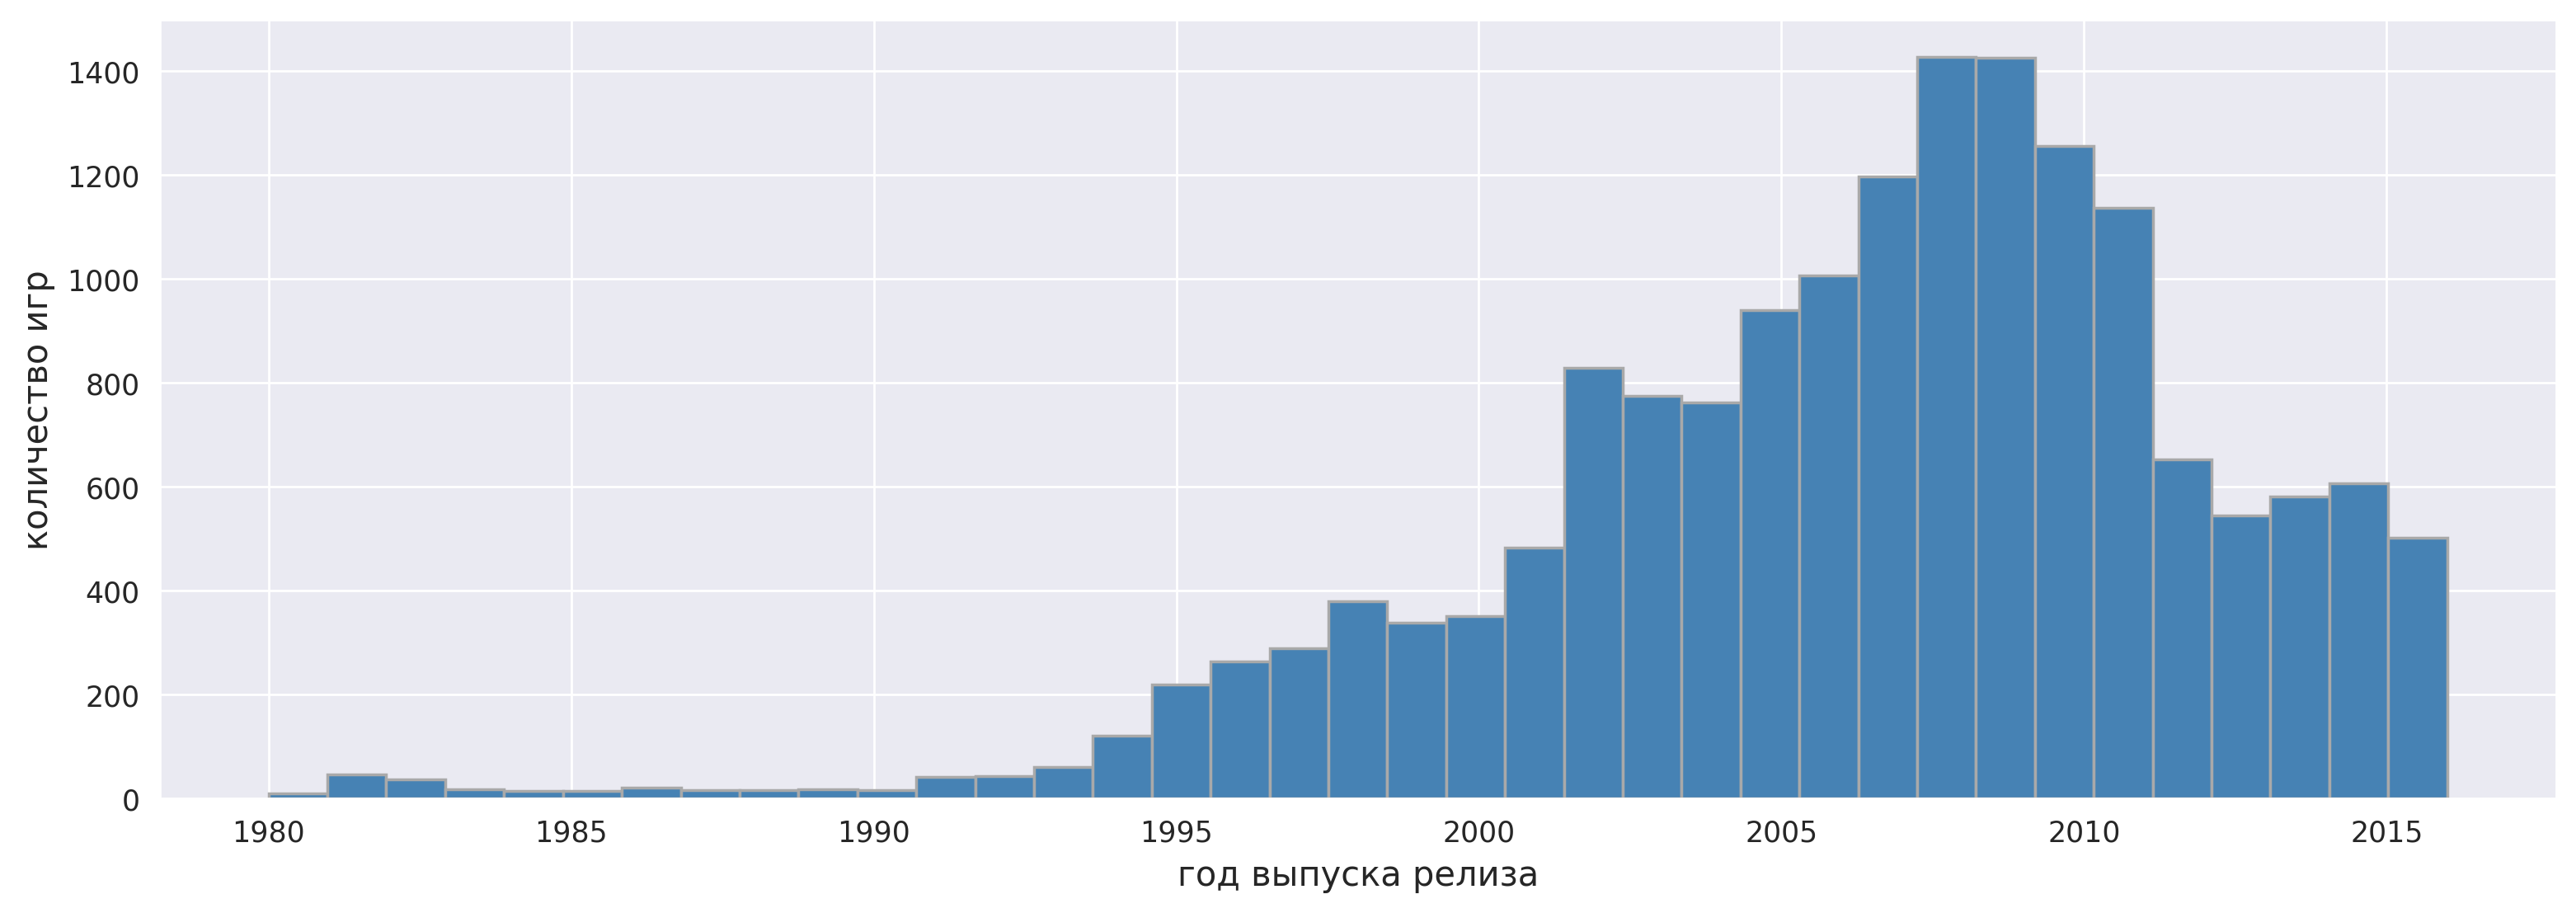

In [41]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(15, 5), dpi= 250)
df[df['year_of_release'] > 0]['year_of_release'].hist(bins=37, color='steelblue', ec="darkgrey")
plt.xlabel('год выпуска релиза', fontsize=12) 
plt.ylabel('количество игр', fontsize=12) 
plt.show()    

Для универсальности построим линейный график

In [42]:
t = df.groupby('year_of_release')['year_of_release'].count().iloc[1:]

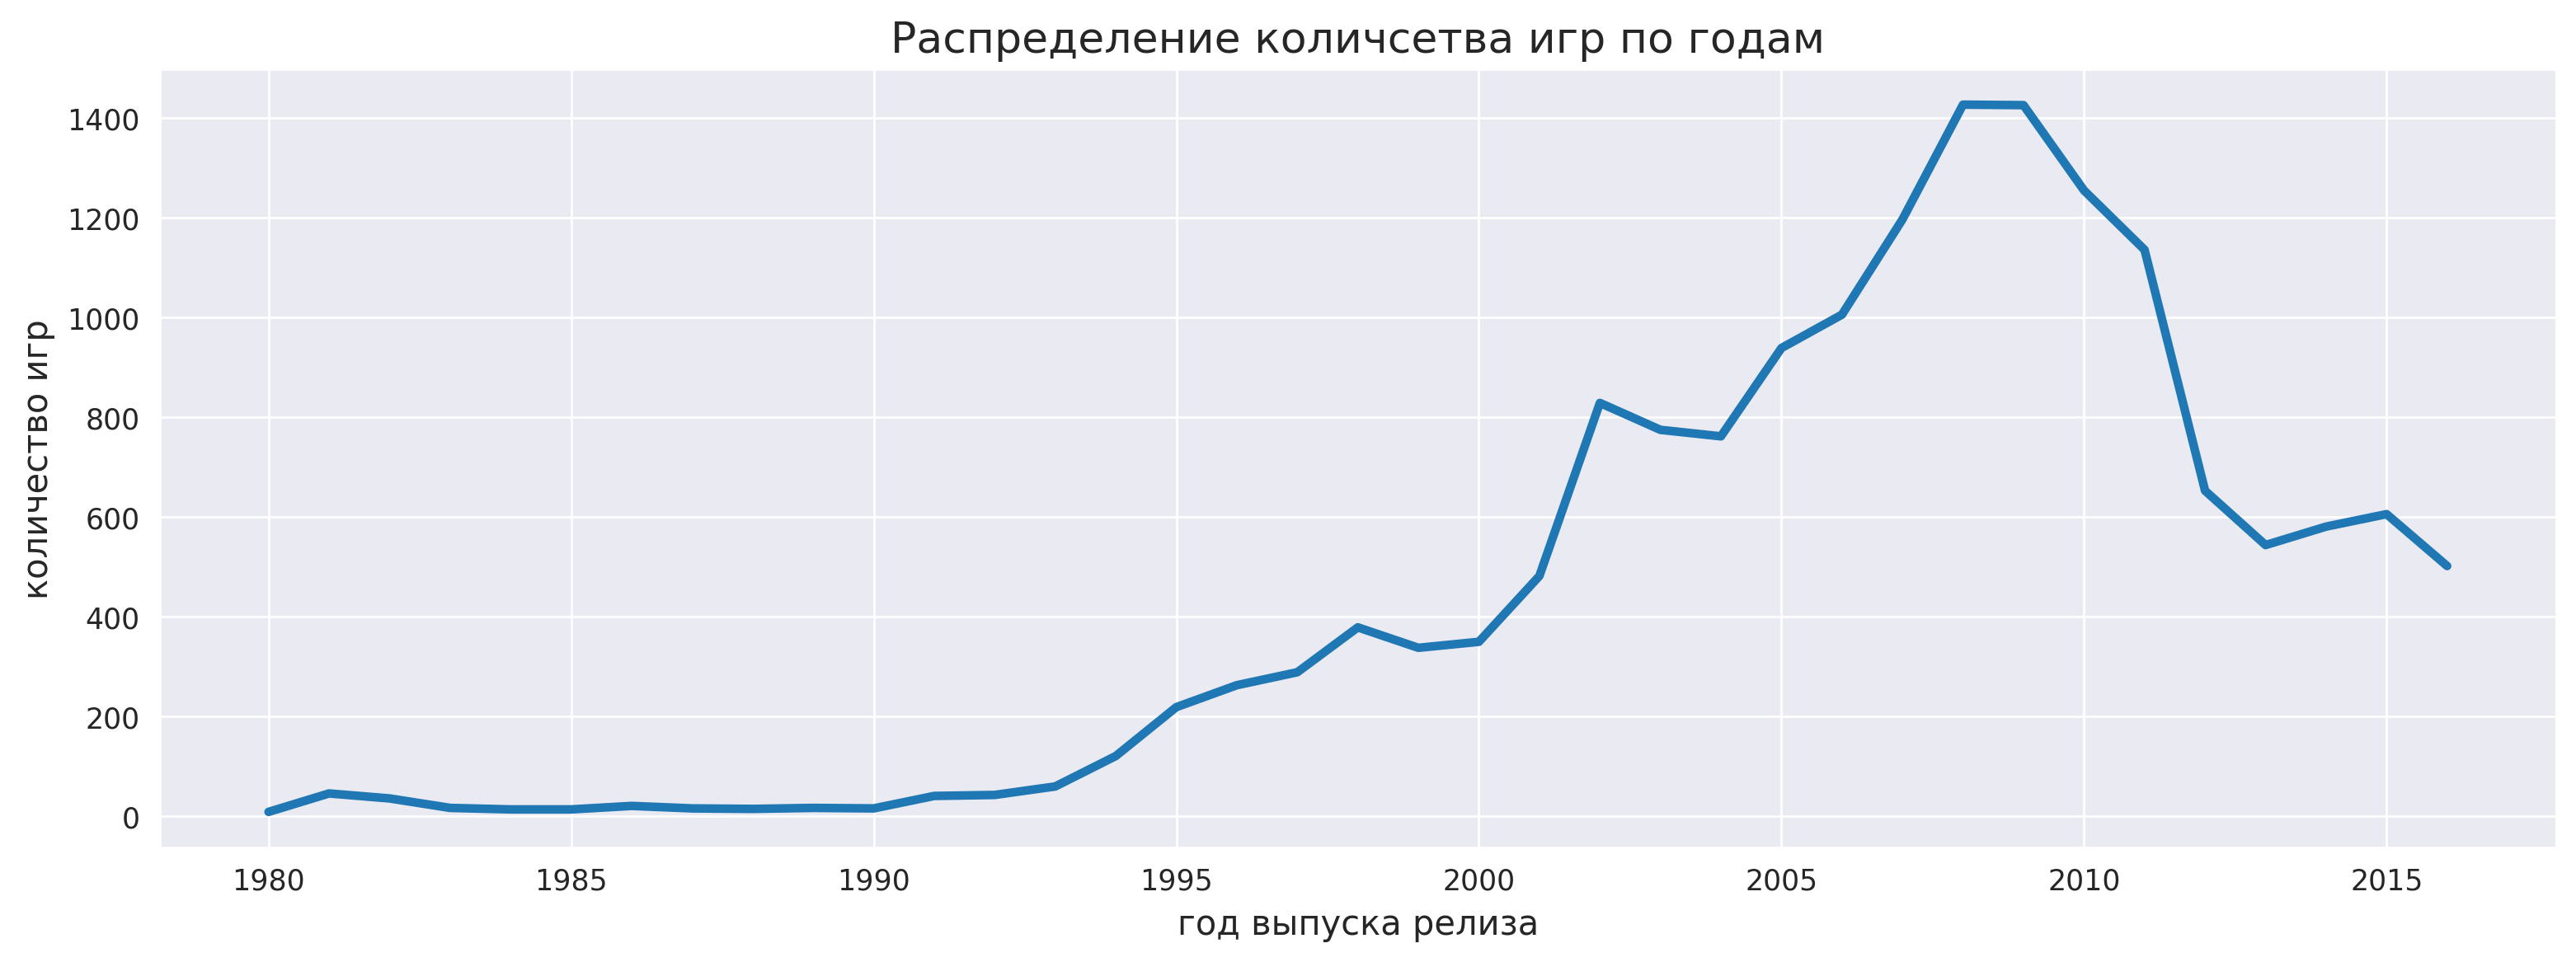

In [43]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(15, 5), dpi=250)
sns.lineplot(data = t, lw = 3)
plt.title('Распределение количсетва игр по годам', fontsize = 15)
plt.xlabel('год выпуска релиза', fontsize=12) 
plt.ylabel('количество игр', fontsize=12) 
plt.show()   

До 1995 года выпускалось не более 200 игр, потом начался стремительный рост, пик пришёлся на 2006-2011 год, в 2012г количество игр упало почти в два раза и равнялся показателям 2001-2002г.  
Для исследования нам не важен период до 1995 года, этот период можно назвать реликтовым.   
Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

In [44]:
top_platform = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index[:6]
top_platform

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')

In [45]:
top_platform_df = df.query('platform in @top_platform')

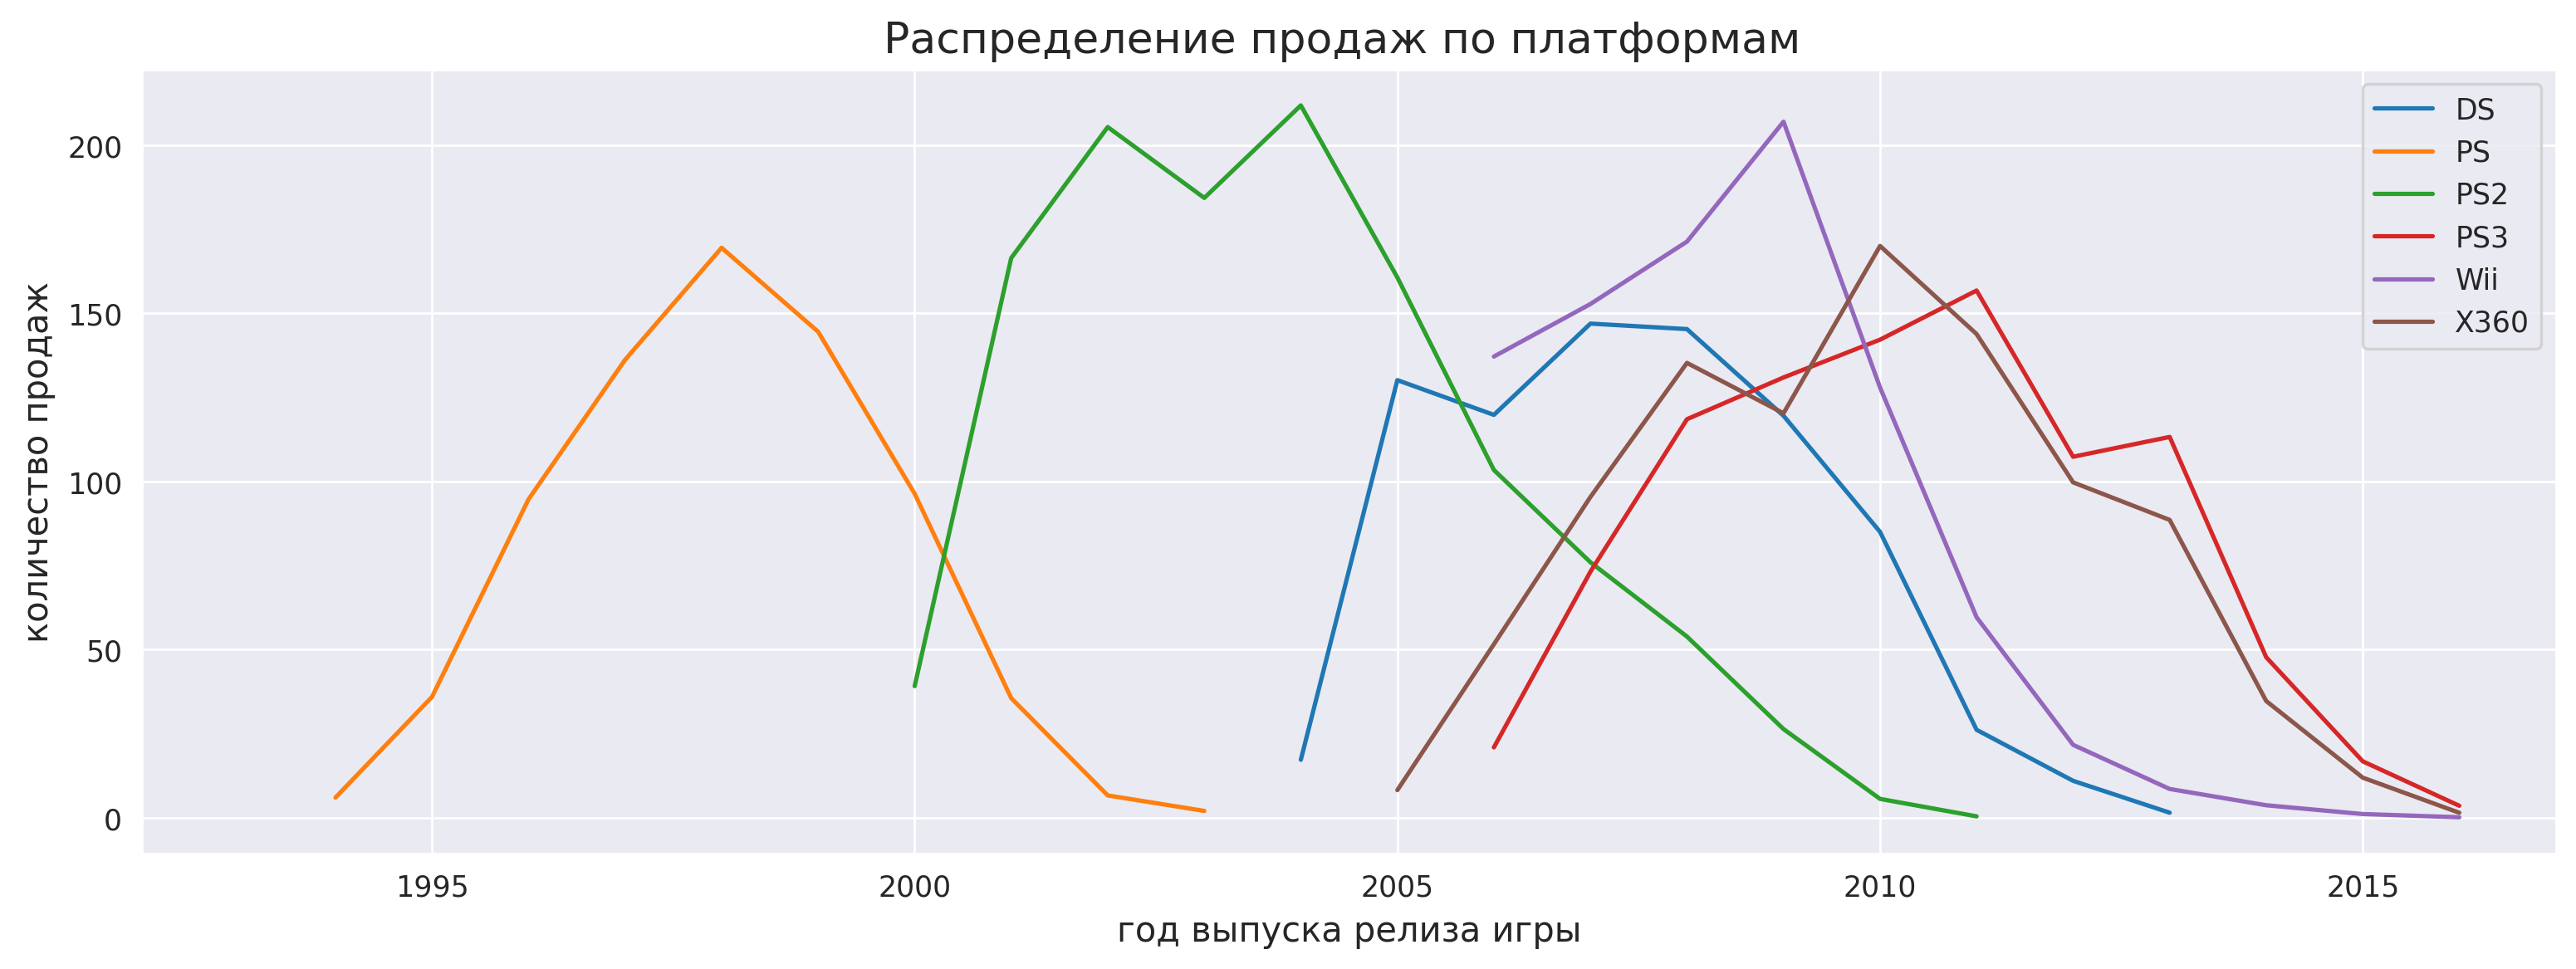

In [46]:
f, ax = plt.subplots(figsize=(15, 5), dpi=250)
plt.plot(top_platform_df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum'))
plt.title('Распределение продаж по платформам ', fontsize = 15)
plt.xlabel('год выпуска релиза игры', fontsize=12) 
plt.ylabel('количество продаж', fontsize=12)
plt.legend(top_platform_df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum'))
plt.xlim(1992, 2017)
plt.show() 

По графику видно, что в среднем игры для платформ выпускаются на протяжении 10 лет, из этого можно сделать вывод что платформа так же 'живет' порядка 10 лет.

Возьмем данные за 2012-2016 год, определим потенциально прибыльные платформы — эти данные помогут построить прогноз на 2017 год.

In [47]:
relevant_time = df[df['year_of_release'] >= 2012].reset_index(drop=True)
relevant_time.sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1527,God Eater 2: Rage Burst,PS4,2015,Role-Playing,0.00,0.01,0.09,0.00,69.0,8.0,T,0.10
307,Persona 4: Golden,PSV,2012,Role-Playing,0.36,0.23,0.38,0.15,93.0,9.2,M,1.12
1216,Hatsune Miku and Future Stars: Project Mirai,3DS,2012,Misc,0.00,0.00,0.18,0.00,-2.0,-2.0,-2,0.18


In [48]:
relevant_time.pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum'
).sort_values(by='year_of_release', ascending=False)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN


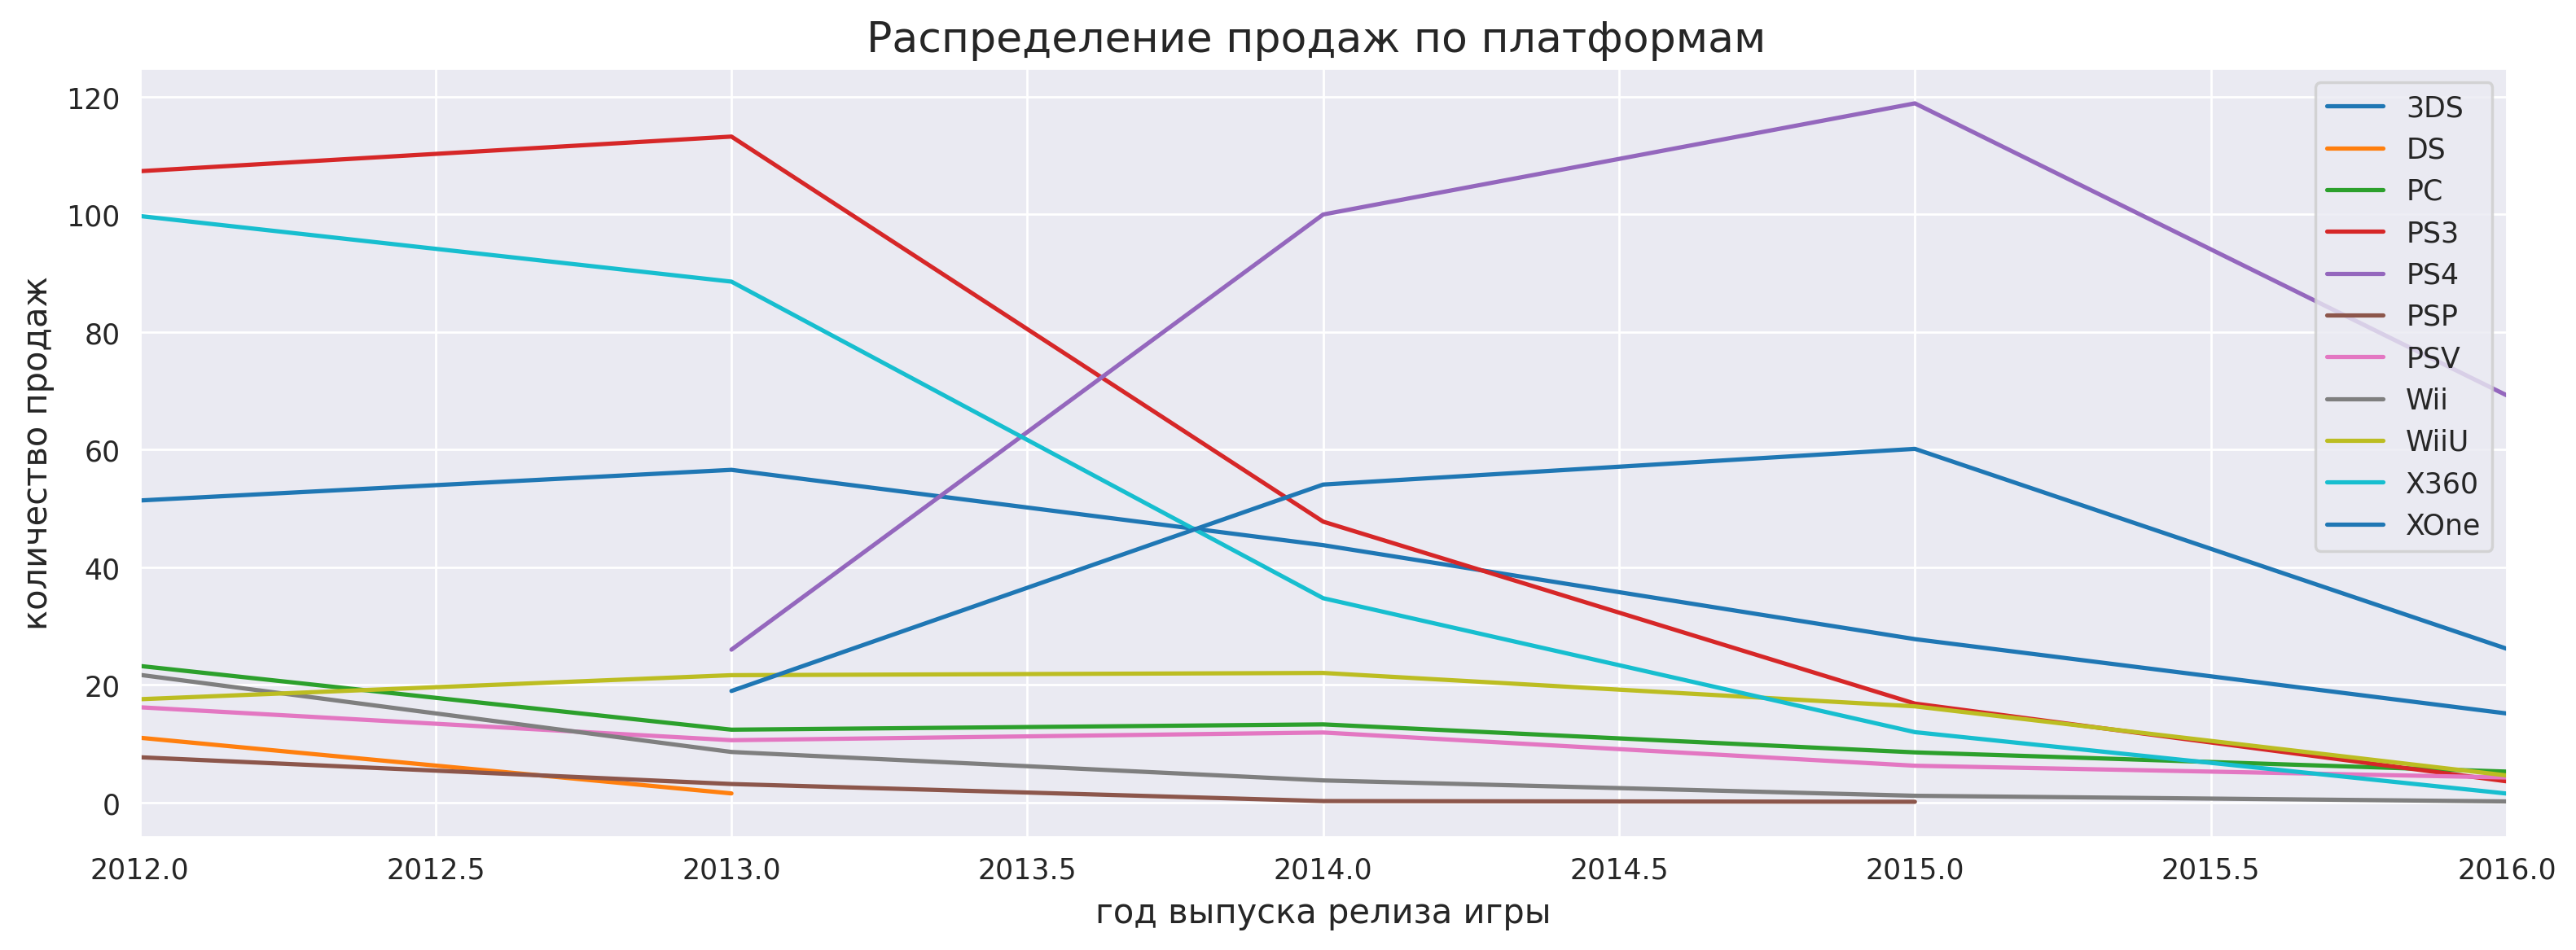

In [49]:
f, ax = plt.subplots(figsize=(15, 5), dpi= 250)
plt.plot(relevant_time.pivot_table(index='year_of_release', columns='platform', 
                                   values='total_sales', aggfunc='sum').sort_values(by='year_of_release', ascending=False))
plt.title('Распределение продаж по платформам ', fontsize = 15)
plt.xlabel('год выпуска релиза игры', fontsize=12) 
plt.ylabel('количество продаж', fontsize=12)
plt.legend(relevant_time.pivot_table(index='year_of_release', columns='platform', 
                                     values='total_sales', aggfunc='sum').sort_values(by='year_of_release', ascending=False))
plt.xlim(2012, 2016)
plt.show() 

Т.к. данные на 2016 год могут быть еше не полные, будем ориентироваться на 2012 - 2015 год.   
Первое место на 2015 год занимает приставка PS4, следом идут конкуренты XOne,у обоих убедительный рост начиная с 2013, года когда модели вышли в продажу, с этого же момента их предшественники PS3 и  X360 показывают спад.  
Nintendo 3DS поступила в продажу в Японии 26 февраля 2011 года и все это время удерживает почетное 3-е место.  
Далее для анализа будем рассматривать три эти приставки.

In [50]:
top_platform_relevant_time = ['PS4', 'XOne', '3DS']

In [51]:
relevant_time = relevant_time.query('platform in @top_platform_relevant_time')
relevant_time.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-2.0,-2.0,-2,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-2.0,-2.0,-2,14.60
6,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Построим «ящик с усами» по глобальным продажам игр в разбивке по платформам.  

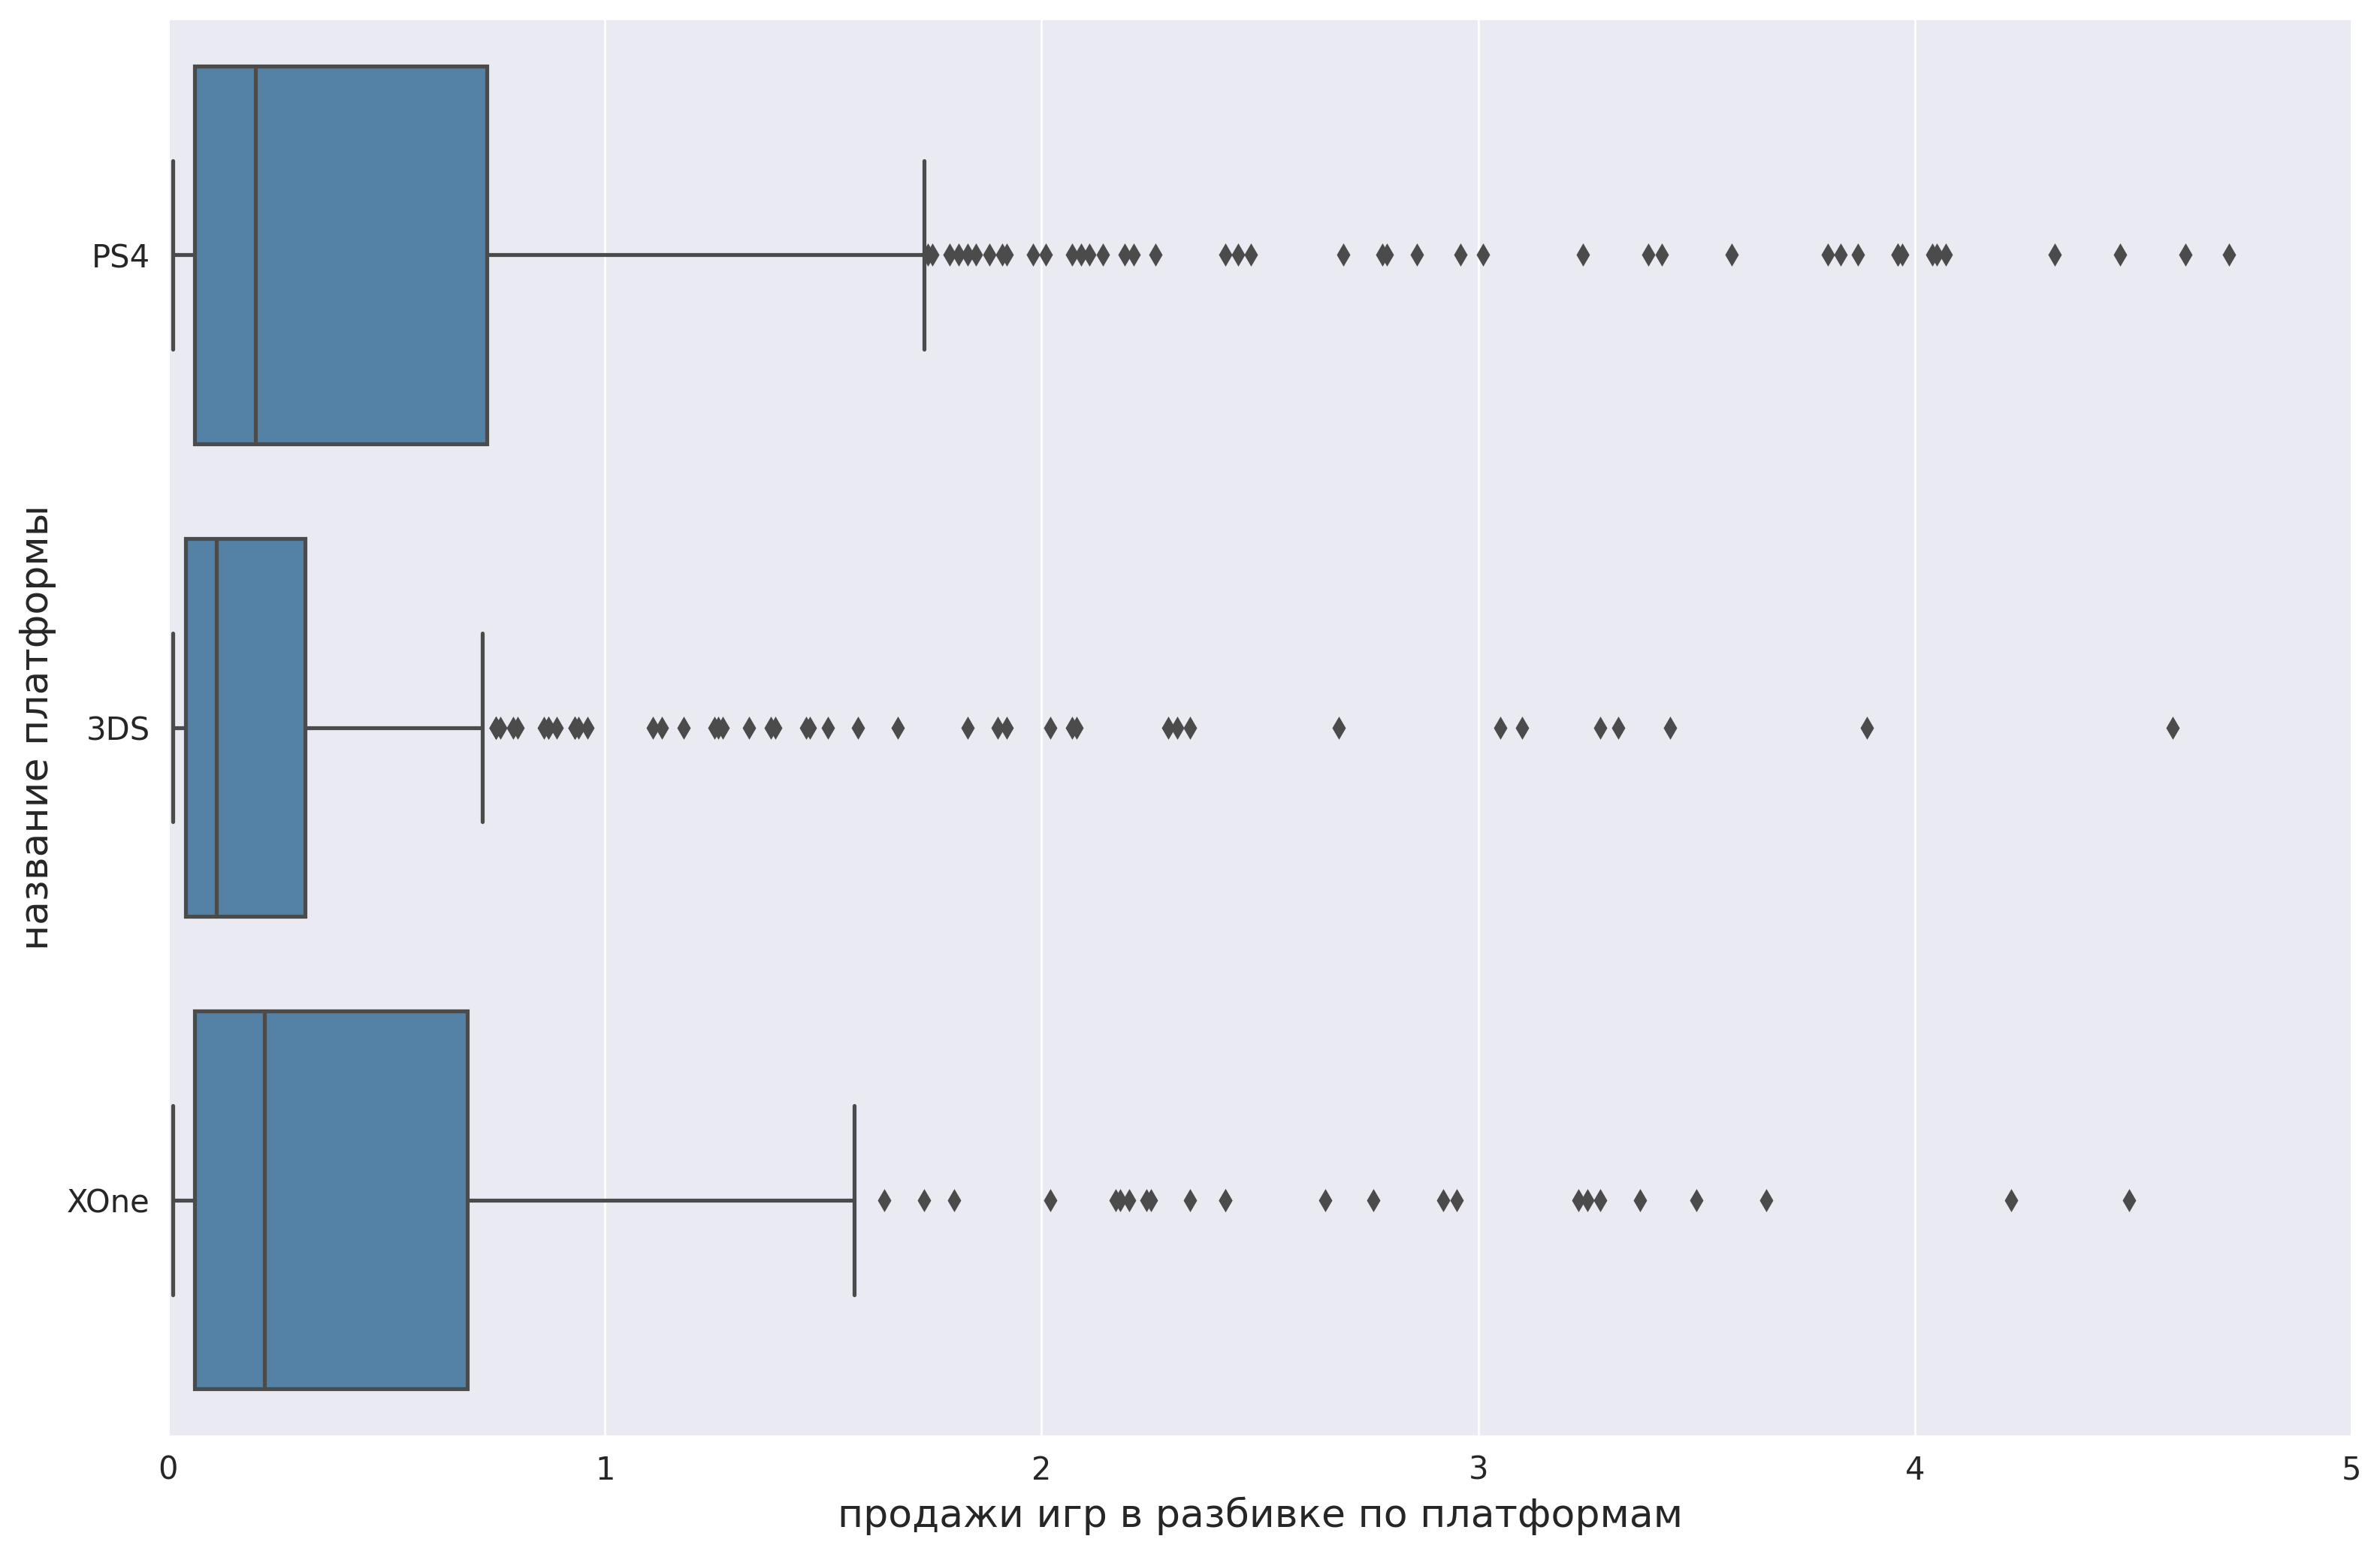

In [52]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(15,10), dpi= 250)
ax = sns.boxplot(data=relevant_time, x='total_sales', y='platform',  color='steelblue')
ax.set_xlim(0,5)
ax.set_xlabel('продажи игр в разбивке по платформам', fontsize=15)
ax.set_ylabel('название платформы', fontsize=15)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

Посмотрим не среднее и медиану

In [53]:
relevant_time.groupby('platform')['total_sales'].agg(['count','sum', 'median', 'mean'])

,count,sum,median,mean
platform,,,,
3DS,396,194.61,0.11,0.491439
PS4,392,314.14,0.20,0.801378
XOne,247,159.32,0.22,0.645020


Хорошо что добавили табличку, информация стала наглядней.  
Можно сказать, что самые слабые 'показатели' у 3DS, при этом прилично выбросов.  
У PS4 ящик хоть и побольше, но медианное значение меньше чем у XOne, зато длиннее усы и больше выбросов.  
Если проранжировать эти приставки в порядке привлекательности для инвестиций, на первое место поставил б PS4, потом XOne и на последнем месте среди топ3 3DS

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.  
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами для PS4

In [54]:
relevant_time_PS4 = relevant_time[(relevant_time['platform'] == 'PS4') & (relevant_time['critic_score'] >= 0) & (
    relevant_time['user_score'] >= 0)]
relevant_time_PS4.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
14,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
18,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


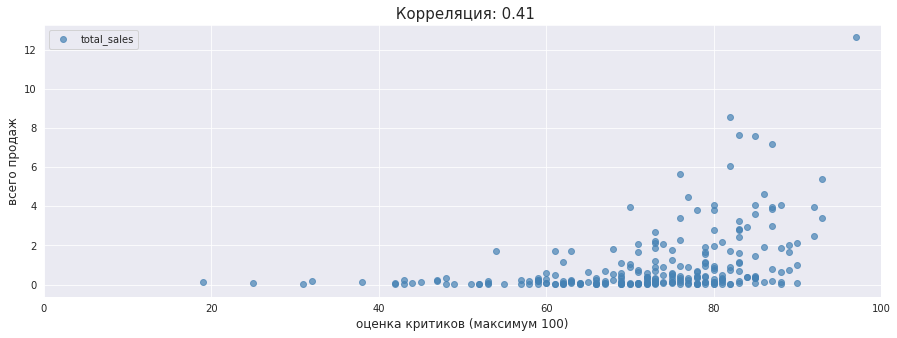

In [55]:
relevant_time_PS4.plot(
    x='critic_score', y = 'total_sales', style = 'o', figsize=(15,5), xlim=(0,100), color='steelblue', alpha = 0.7
)
plt.title(f" Корреляция: {relevant_time_PS4['total_sales'].corr( relevant_time_PS4['critic_score']).round(2)}", fontsize = 15)
plt.xlabel('оценка критиков (максимум 100)', fontsize=12), plt.ylabel('всего продаж', fontsize=12) 
plt.show() 

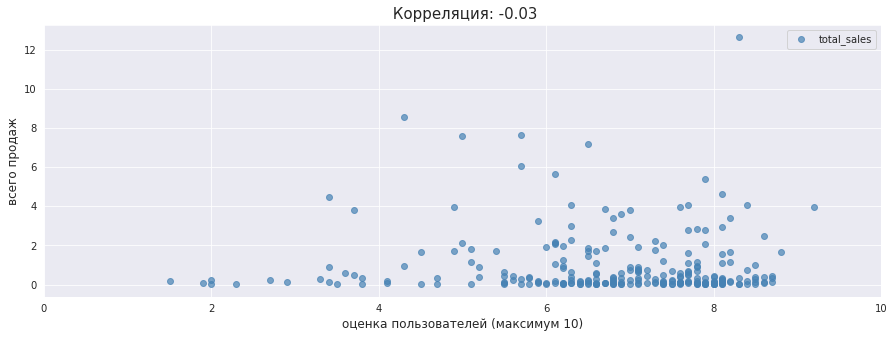

In [56]:
relevant_time_PS4.plot(
    x='user_score', y = 'total_sales', style = 'o', figsize=(15,5), xlim=(0,10),  color='steelblue', alpha = 0.7
)
plt.title(f" Корреляция: {relevant_time_PS4['total_sales'].corr(relevant_time_PS4['user_score']).round(2)}", fontsize = 15)
plt.xlabel('оценка пользователей (максимум 10)', fontsize=12), plt.ylabel('всего продаж', fontsize=12) 
plt.show() 

In [57]:
relevant_time_XOne = relevant_time[(relevant_time['platform'] == 'XOne') 
                                   & (relevant_time['critic_score'] >= 0) & (relevant_time['user_score'] >= 0)]
relevant_time_3DS = relevant_time[(relevant_time['platform'] == '3DS') 
                                   & (relevant_time['critic_score'] >= 0) & (relevant_time['user_score'] >= 0)]

In [58]:
print(f" Корреляция между продажами и оценками криттиков для XOne:{relevant_time_XOne['total_sales'].corr(relevant_time_XOne['critic_score']).round(2)}")
print(f" Корреляция между продажами и оценками криттиков для для XOne:{relevant_time_XOne['total_sales'].corr(relevant_time_XOne['user_score']).round(2)}")

 Корреляция между продажами и оценками криттиков для XOne:0.41
 Корреляция между продажами и оценками криттиков для для XOne:-0.09


In [59]:
print(f" Корреляция между продажами и оценками криттиков для 3DS:{relevant_time_3DS['total_sales'].corr(relevant_time_3DS['critic_score']).round(2)}")
print(f" Корреляция между продажами и оценками криттиков для для 3DS: {relevant_time_3DS['total_sales'].corr(relevant_time_3DS['user_score']).round(2)}")

 Корреляция между продажами и оценками криттиков для 3DS:0.31
 Корреляция между продажами и оценками криттиков для для 3DS: 0.2


Изучив графики и показатели корреляции, можно прийти к выводу, что линейной связи количества продаж с оценками пользователей и критиков нет.  
Построим тепловую карту, для 3-х наших платформ и посмотрим на корреляцию в общем.

In [60]:
relevant_time_score = relevant_time[(relevant_time['critic_score'] >= 0) & (relevant_time['user_score'] >= 0)]

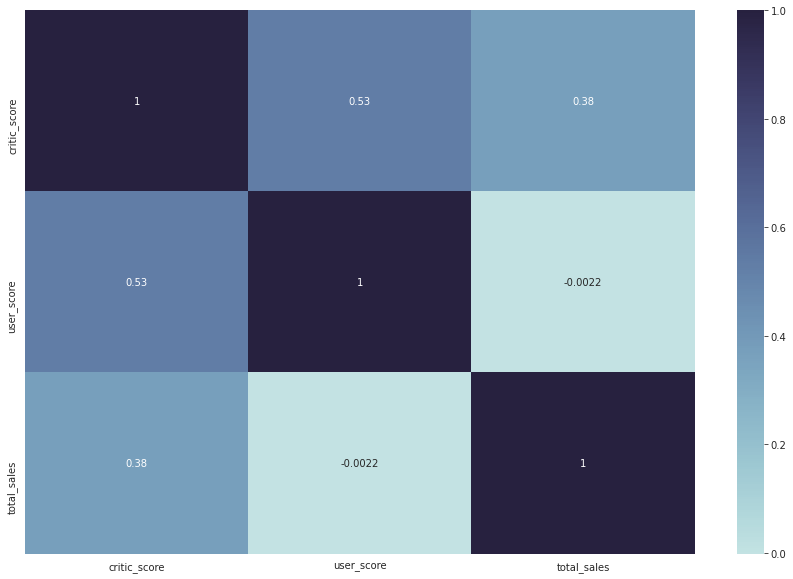

In [61]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(relevant_time_score[['critic_score', 'user_score', 'total_sales']].corr(), 
            cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True), annot = True)
plt.show()

По тепловой карте видно, что зависимости нет.

Посмотрим на общее распределение игр по жанрам. Проверим выделяются ли жанры с высокими и низкими продажами.

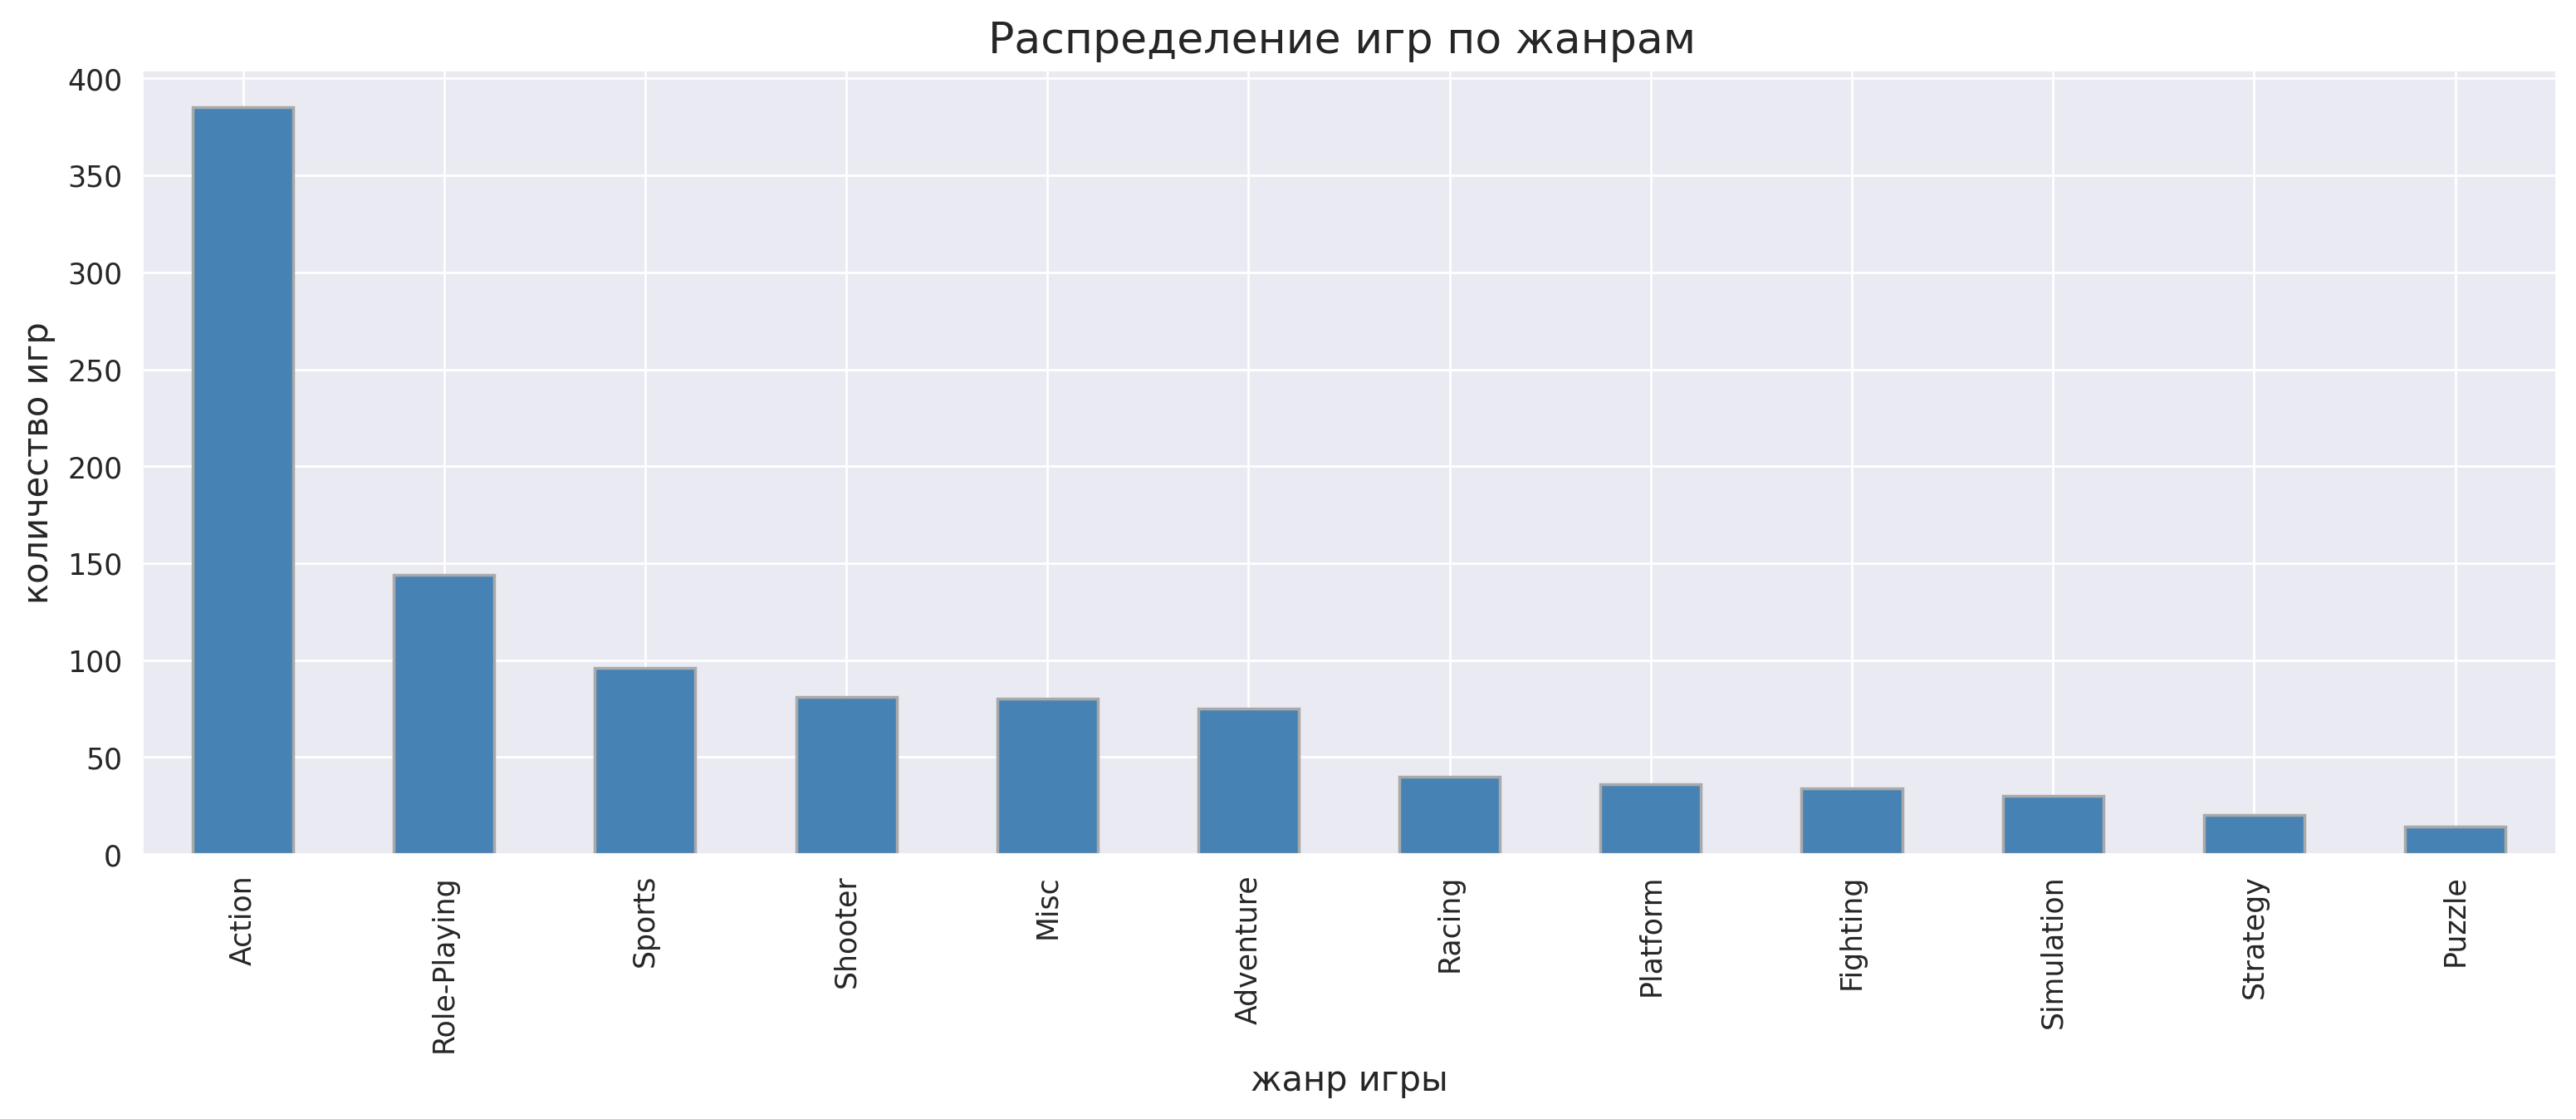

In [62]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(15, 5), dpi= 250)
relevant_time['genre'].value_counts().plot(kind='bar', color='steelblue', ec="darkgrey", )
plt.title('Распределение игр по жанрам ', fontsize = 15)
plt.xlabel('жанр игры', fontsize=12) 
plt.ylabel('количество игр', fontsize=12)
plt.show()

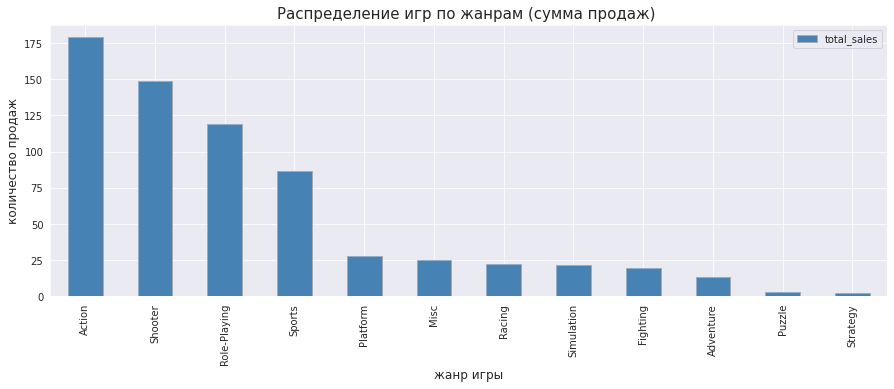

In [63]:
sns.set_style("darkgrid")
relevant_time.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).plot(kind='bar', color='steelblue', ec="darkgrey", figsize=(15, 5))
plt.title('Распределение игр по жанрам (сумма продаж) ', fontsize = 15)
plt.xlabel('жанр игры', fontsize=12) 
plt.ylabel('количество продаж', fontsize=12)
plt.show()

In [64]:
relevant_time[relevant_time['genre'] == 'Shooter'].sort_values(
    by='total_sales', ascending=False).iloc[:6]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-2.0,-2.0,-2,14.63
17,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-2.0,-2.0,-2,7.98
18,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
21,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,-2.0,-2.0,-2,7.39
30,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76.0,6.1,T,5.64
32,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39


In [65]:
relevant_time[relevant_time['genre'] == 'Action'].sort_values(
    by='total_sales', ascending=False).iloc[:6]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
31,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
41,The Last of Us,PS4,2014,Action,1.88,2.00,0.07,0.77,-2.0,-2.0,-2,4.72
42,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
43,Luigi's Mansion: Dark Moon,3DS,2013,Action,1.80,1.39,1.11,0.29,86.0,8.4,E,4.59
56,Watch Dogs,PS4,2014,Action,1.40,1.90,0.11,0.64,80.0,6.3,M,4.05


Больше всего игр жанра Action, по количеству игр они в два раза превосхоядт Role-Playing  и Sports по ним и больше всего продаж.  
На четвертом месте по колчиеству игр занимает жанр Shooter, но за счет игры Call of Duty, жанр занимает второе место по продажам.  
Мы ранее увидели, что у игр достаточно много серьезных выбросов. Некоторые игры окупают бюджет десятков провальных проектов,  проанализировать медиану продаж, так мы избежим влияния выбросов.  

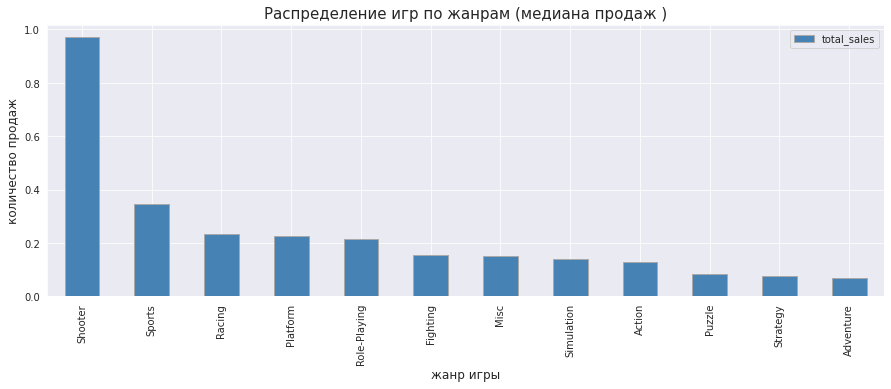

In [66]:
sns.set_style("darkgrid")
relevant_time.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(
    by='total_sales', ascending=False).plot(kind='bar', color='steelblue', ec="darkgrey", figsize=(15, 5))
plt.title('Распределение игр по жанрам (медиана продаж )', fontsize = 15)
plt.xlabel('жанр игры', fontsize=12) 
plt.ylabel('количество продаж', fontsize=12)
plt.show()

Картинка кардинально изменилась, на первое место вышли игры жанра `Shooter`, а `Action` провалилось на 9.  
Посмотрим какие игры генерируют больше всего продаж

In [67]:
relevant_time[relevant_time['genre'] == 'Shooter'].sort_values(by='total_sales', ascending=False).iloc[:12]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-2.0,-2.0,-2,14.63
17,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-2.0,-2.0,-2,7.98
18,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
21,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,-2.0,-2.0,-2,7.39
30,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76.0,6.1,T,5.64
32,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
34,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
44,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
45,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
55,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07


In [68]:
relevant_time[relevant_time['genre'] == 'Action'].sort_values(by='total_sales', ascending=False).iloc[:6]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
31,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
41,The Last of Us,PS4,2014,Action,1.88,2.00,0.07,0.77,-2.0,-2.0,-2,4.72
42,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
43,Luigi's Mansion: Dark Moon,3DS,2013,Action,1.80,1.39,1.11,0.29,86.0,8.4,E,4.59
56,Watch Dogs,PS4,2014,Action,1.40,1.90,0.11,0.64,80.0,6.3,M,4.05


Мы видим что из первых 12 мест в жанре `Shooter` , `Call of Duty` в разных версиях и для разных приставок занимают 6 мест.  
В `Action` почти 20 миллион проданных копий пришлось на `Grand Theft Auto V` .  
Наш предполагаемый заказчик хочет выгодно инвестировать, но не хочет сильно рисковать, что бы минимизировать риски, избавимся от выбросов и построим еше раз график с медианной про количеству проданных копий.   
Для начала посомтрим какие значения попадают в последний 10% продаж и на основании этой информации отсечем выбросы

In [69]:
relevant_time[relevant_time['genre'] == 'Action']['total_sales'].quantile([0.90, 1])

0.9     1.224
1.0    12.620
Name: total_sales, dtype: float64

In [70]:
relevant_time[relevant_time['genre'] == 'Shooter']['total_sales'].quantile([0.90, 1])

0.9     4.47
1.0    14.63
Name: total_sales, dtype: float64

Так как общая картина у нас есть, предлагаю посмотреть на распределение в диапазоне 0,1 - 0,9

In [71]:
q_low = relevant_time["total_sales"].quantile(0.10)
q_hi  = relevant_time["total_sales"].quantile(0.90)

In [72]:
relevant_time_quantile = relevant_time[(relevant_time["total_sales"] < q_hi) 
                                       & (relevant_time["total_sales"] > q_low)].reset_index()
relevant_time_quantile.head(5)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,185,The Order: 1886,PS4,2015,Shooter,0.61,0.78,0.06,0.27,63.0,6.6,M,1.72
1,188,The Crew,PS4,2014,Racing,0.35,1.08,0.03,0.26,61.0,5.4,T,1.72
2,192,No Man's Sky,PS4,2016,Action,0.63,0.76,0.03,0.27,71.0,4.5,T,1.69
3,195,Fire Emblem Fates,3DS,2015,Role-Playing,0.81,0.23,0.52,0.11,-2.0,-2.0,-2,1.67
4,197,Until Dawn,PS4,2015,Adventure,0.45,0.90,0.05,0.26,79.0,8.2,M,1.66


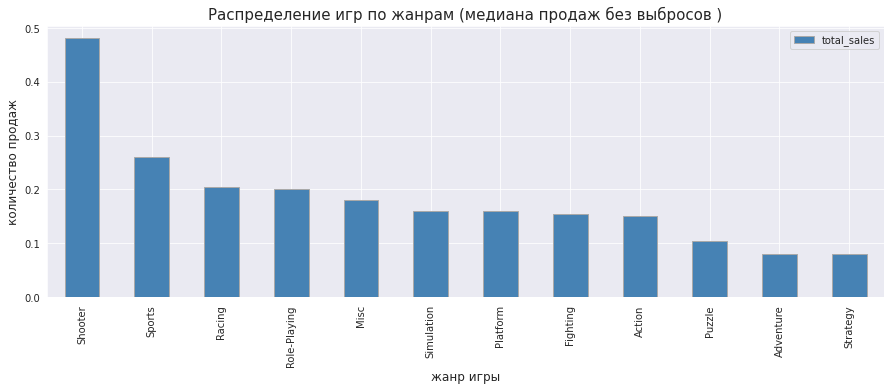

In [73]:
sns.set_style("darkgrid")
relevant_time_quantile.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(
    by='total_sales', ascending=False).plot(
    kind='bar', color='steelblue', ec="darkgrey", figsize=(15, 5))
plt.title('Распределение игр по жанрам (медиана продаж без выбросов )', fontsize = 15)
plt.xlabel('жанр игры', fontsize=12) 
plt.ylabel('количество продаж', fontsize=12)
plt.show()

**Вывод:** Нам удалось установить что с 1995 до 2012 года был рост количества игр. В 2012 был резкий спад, после чего рынок стал постепенно восстанавливаться. Выделили три приставки PS4, XOne и 3DS, которые на данный момент являются лидерами в своем сегменте. Установили, что мнение критиков и пользователей линейно не влияет на рейтинг продаж приставок.  
Самые популярные жанры игр Action, Role-Playing и Sports, cамые продаваемые Action, Shooter и Role-Playing.
`Action` зачёт количества игр лидирует и по суммам продаж, но если смотреть медианное значение, по объёмам продаж игры жанра `Shooter` опережают своих конкурентов почти в три раза.  
Избавившись от выбросов, мы посмотрели еше раз график продаж. `Shooter` сохранил за собой первое место.   
Если мы хотим минимизировать риски, стоит присмотреться к играм жанра `Shooter`, если риск-профиль позволяет, можно попытаться счастье в `Action`, игры жанра `Sports` можно назвать крепким середнячком, приличное количество игр, хорошая сумма продаж, отличная медиана.

**Вывод:** Нам удалось установить что с 1995 до 2012 года был рост количества игр. В 2012 был резкий спад, после чего рынок стал постепенно восстанавливаться. Выделили три приставки PS4, XOne и 3DS, которые на данный момент являются лидерами в своем сегменте. Установили, что мнение критиков и пользователей линейно не влияет на рейтинг продаж приставок. Самые популярные жанры игр Action, Role-Playing и Sports. Самые продаваемые Action, Shooter и Role-Playing

### Составим портрет пользователя каждого региона

In [74]:
df_region = df[df['year_of_release'] >= 2012].reset_index(drop=True)
df_region.sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2257,Tokyo Xanadu eX+,PS4,2016,Role-Playing,0.0,0.0,0.03,0.00,-2.0,-2.0,-2,0.03
2464,Ukiyo no Roushi,PSV,2015,Action,0.0,0.0,0.02,0.00,-2.0,-2.0,-2,0.02
116,Need for Speed (2015),PS4,2015,Racing,0.5,1.5,0.05,0.37,-2.0,-2.0,-2,2.42


Построим распределение популярности платформ в зависимости от региона  

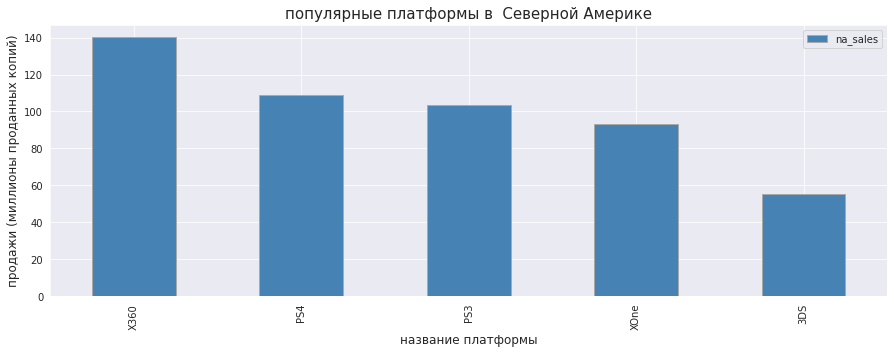

In [75]:
region_plot('na_sales', ' Северной Америке')

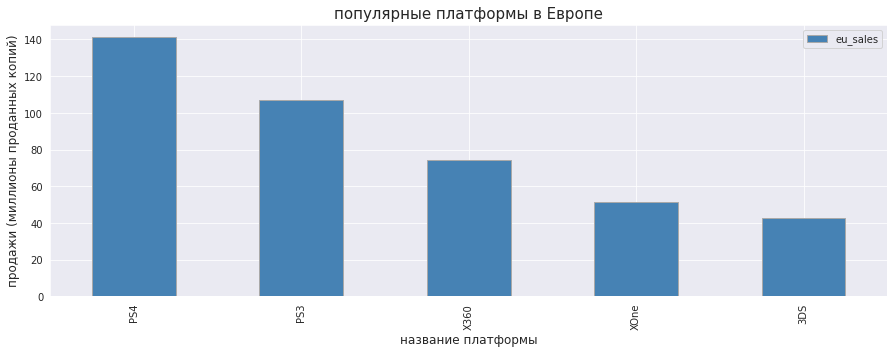

In [76]:
region_plot('eu_sales', 'Европе')

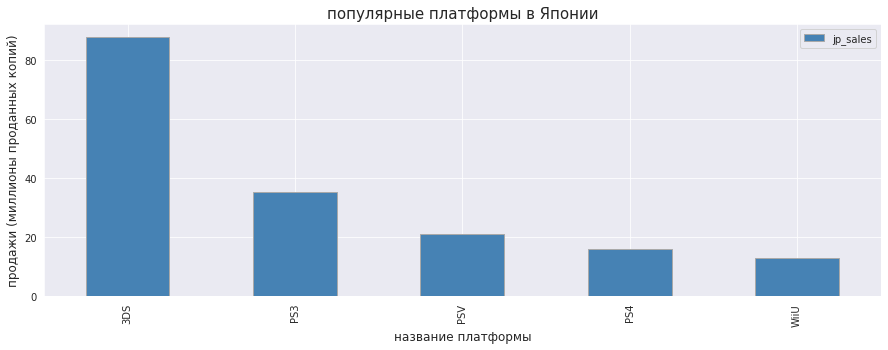

In [77]:
region_plot('jp_sales', 'Японии')

В каждом регионе преобладает своя приставка:   
* в Северной Америке популярен X360, потом продукты от Sony и на 4 месте новая модель XOne
* в Европе PS4, далее идет ее предшественник PS3   
* в Япони с большим отрывом 3DS.  

Посмотрим на различия в долях продаж по региону

In [78]:
t_na = region_table('na_sales')
t_eu = region_table('eu_sales')
t_jp = region_table('jp_sales')

In [79]:
t_merge = t_na.merge(t_eu, on='platform', how='outer') 

In [80]:
t_merge.merge(t_jp, on='platform', how='outer') 

,platform,na_sales,eu_sales,jp_sales
0,X360,23.698326,14.703445,0.815246
1,PS4,18.400257,27.838286,8.287465
2,PS3,17.493274,21.084409,18.324852
3,XOne,15.757145,10.179156,0.176550
4,3DS,9.359189,8.413243,45.586250
5,WiiU,6.447028,4.958368,6.755634
6,PC,3.235359,7.450377,0.000000
7,Wii,2.952773,2.351920,1.760307
8,PSV,1.857962,2.241427,10.925330
9,DS,0.776689,0.696500,1.931665


Сводная таблица подтвердила наши графики и дала возможность посмотреть на цифры.  
Если в Северной Америке доля Х360 - 24%, то в Европе это всего 15%, а в Японии даже не входит в ТОП5.  
Причем в Европе на первом месте PS4, далее идет ее предшественник PS3 и потом только X360, а более новая версия от Microsoft XOne занимает 4 место.   
В Америке PS4 конкурирует с Х360 проигрывая ей пять процентных пункта.   
В Японии почти половина приходится на платфому 3DS, которая в других регионах занимает всего 5 строчку.  
Можно сделать вывод, что в зависимости от региона предпочтения пользователей по приставкам сильно различаются 

Построим распределение популярных жанров в зависимости от региона  

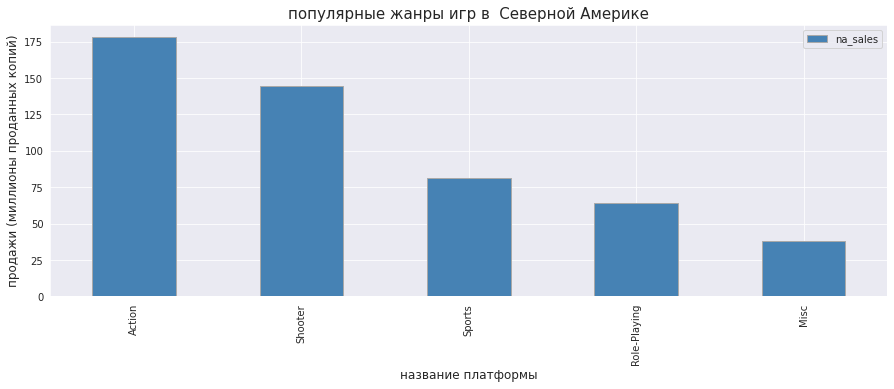

In [81]:
genre_plot('na_sales', ' Северной Америке')

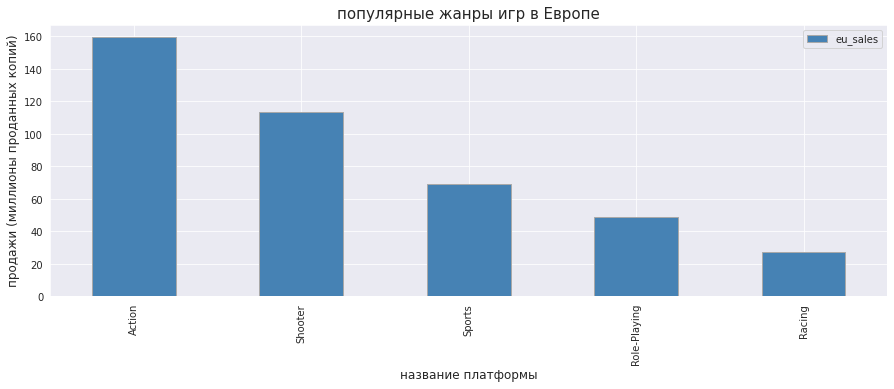

In [82]:
genre_plot('eu_sales', 'Европе')

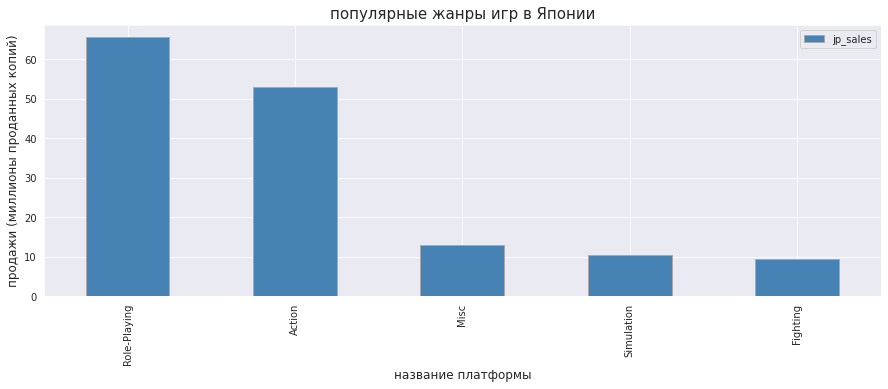

In [83]:
genre_plot('jp_sales', 'Японии')

В предпочтениях по играм, Япония так же выделяется, там больше любят `Role-Playing`, в отличии от Северной Америки и Европы, где на первом месте стоит `Action`.  Если сравнить предпочтения Северной Америки и Европы, можно сказать, что они схожие, различия начинаются только с пятой строчки.

**Влияет ли рейтинг ESRB на продажи в отдельном регионе.** 

ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Выделим четыре названия рейтинга, которые чаще всего встречаются в сете. Подробнее ознакомиться с ESRB можно на  [Википедиии](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board)

«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг

«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики:

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.


Посмотрим вначале на количество игр в зависимости от рейтинга

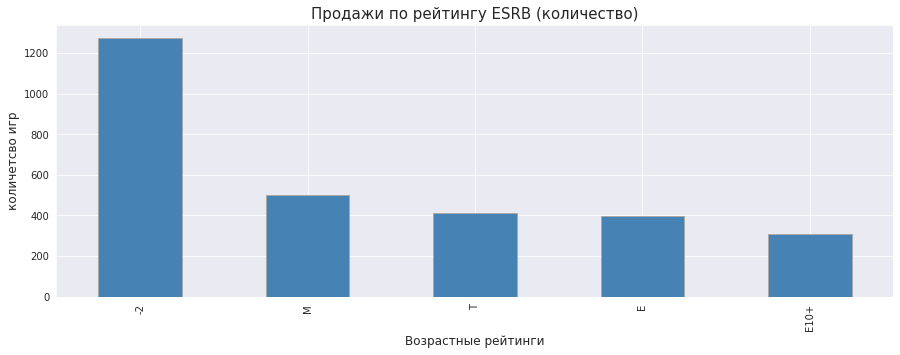

In [84]:
sns.set_style("darkgrid")
df_region['rating'].value_counts().plot(kind='bar',color='steelblue',figsize=(15, 5), ec="darkgrey")
plt.title(f'Продажи по рейтингу ESRB (количество)', fontsize = 15)
plt.xlabel('Возрастные рейтинги', fontsize=12) 
plt.ylabel('количетсво игр', fontsize=12)
plt.show()

Посмотрим на распределение для всех регионов.

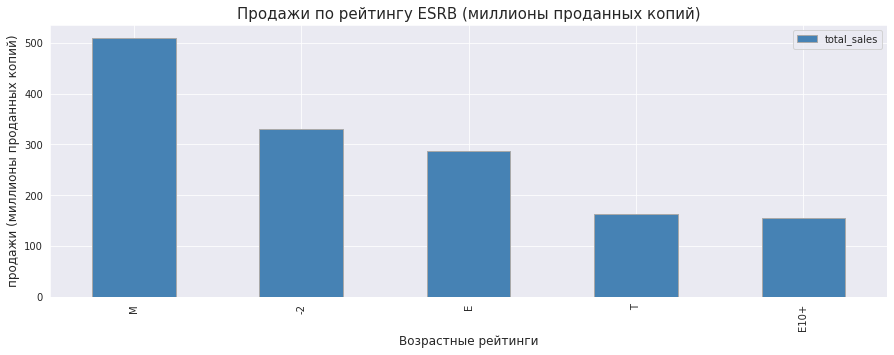

In [85]:
sns.set_style("darkgrid")
df_region.pivot_table(index='rating', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).plot(kind='bar', color='steelblue', figsize=(15, 5), ec="darkgrey")
plt.title(f'Продажи по рейтингу ESRB (миллионы проданных копий)', fontsize = 15)
plt.xlabel('Возрастные рейтинги', fontsize=12) 
plt.ylabel('продажи (миллионы проданных копий)', fontsize=12)
plt.show()

Построим распределение продаж в зависимости от региона

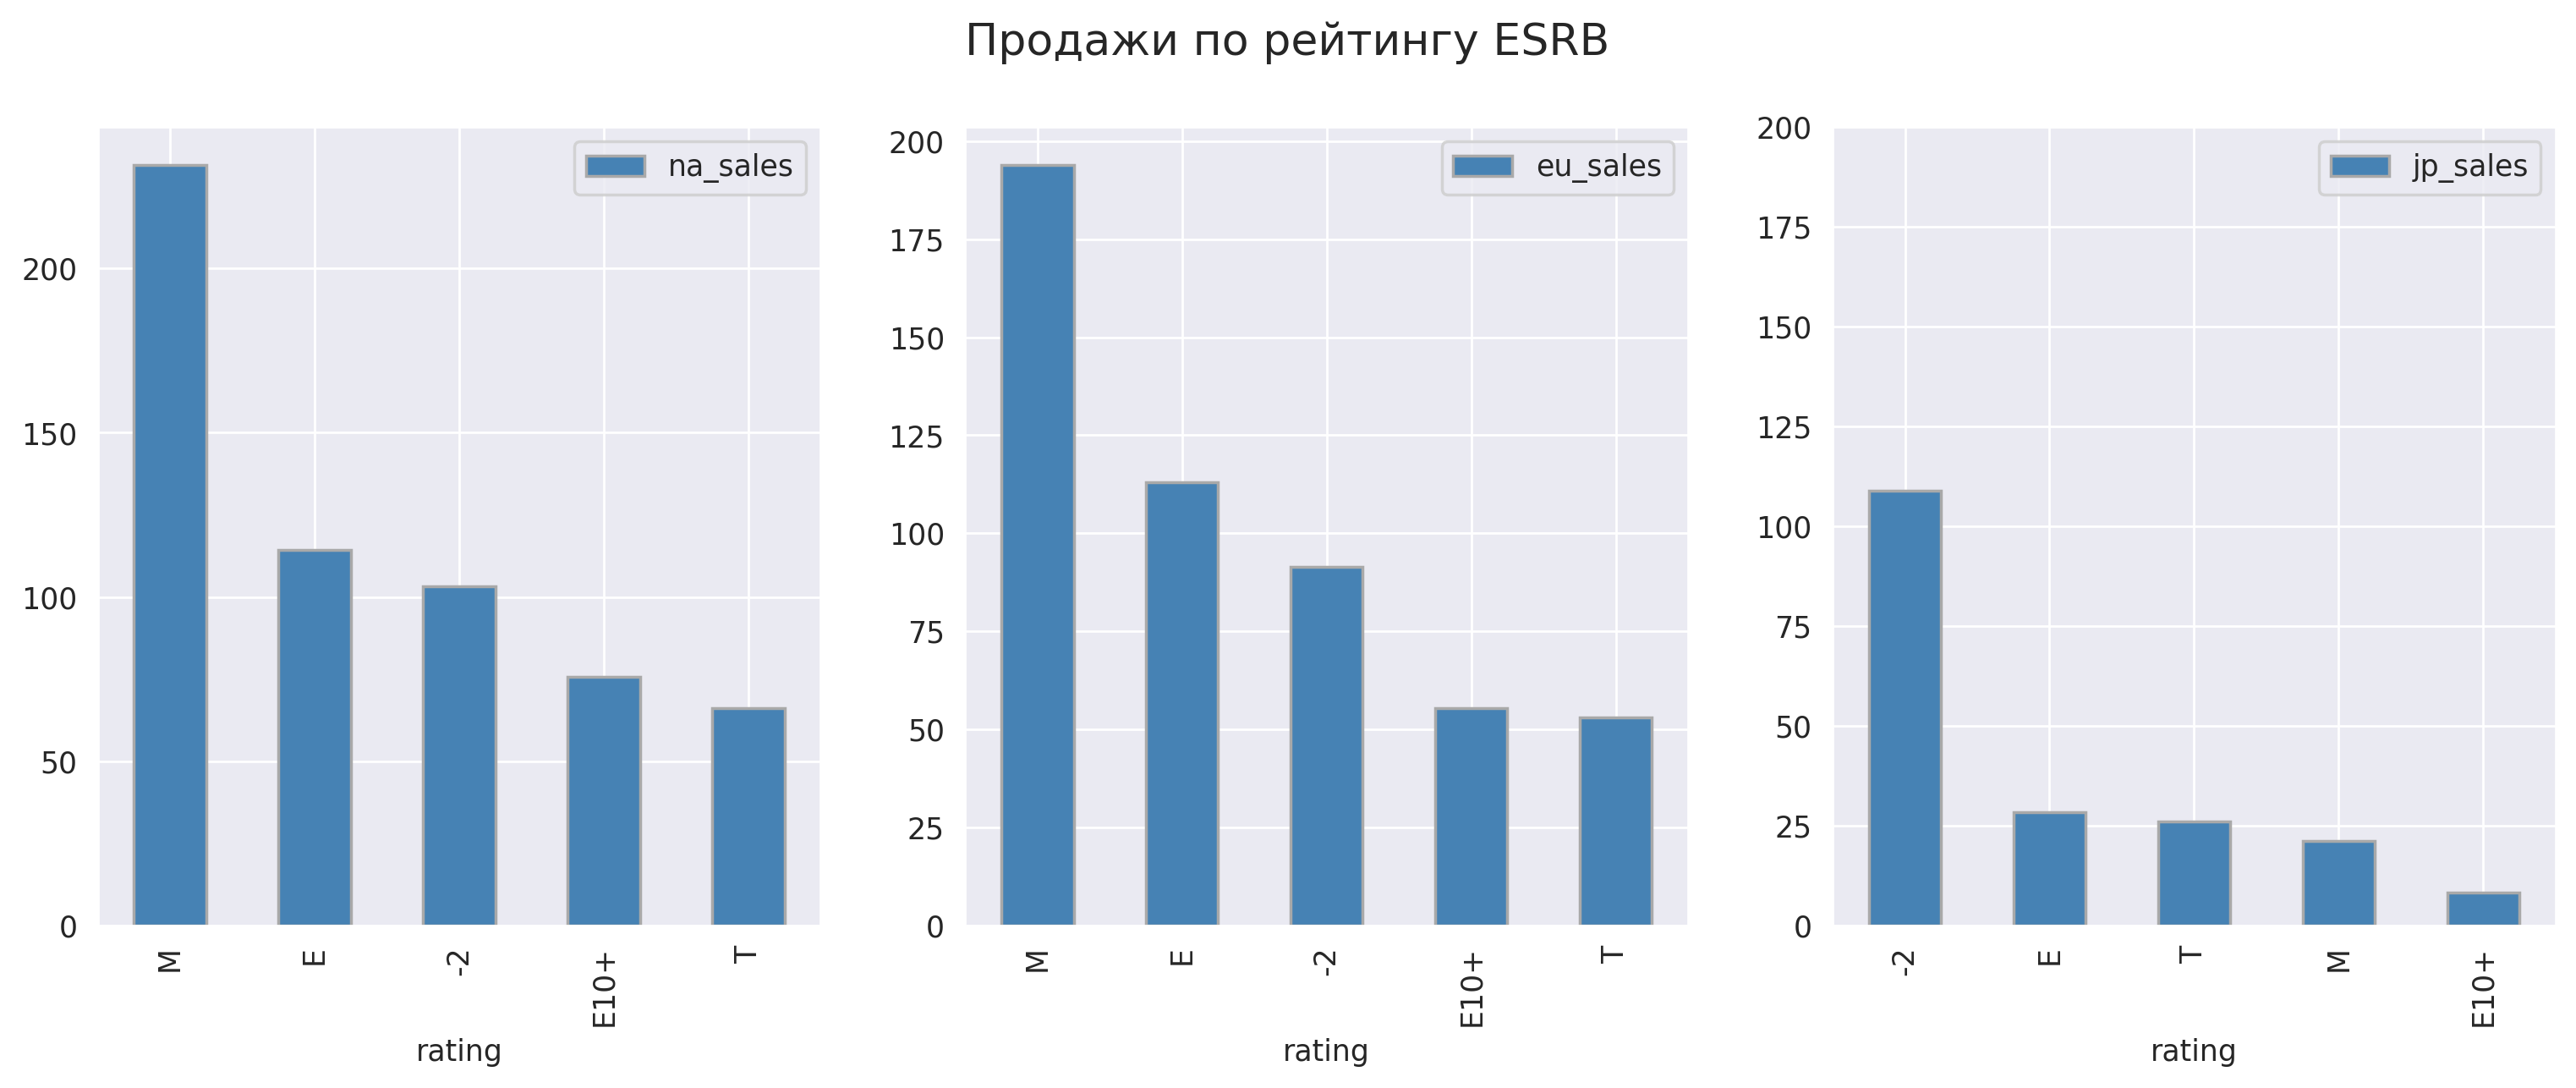

In [86]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(1, 3, figsize=(15,5), dpi= 250)
fig.suptitle('Продажи по рейтингу ESRB', fontsize = 15)

df_region.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(
    by='na_sales', ascending=False).plot(kind='bar', color='steelblue', ec="darkgrey", ax=ax[0])
df_region.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(
    by='eu_sales', ascending=False).plot(kind='bar', color='steelblue', ec="darkgrey", ax=ax[1])
df_region.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(
    by='jp_sales', ascending=False).plot(kind='bar', color='steelblue', ec="darkgrey", ax=ax[2])
plt.ylim(0, 200)
plt.show()

Если в количественном плане, то игры без рейтинга (если предположить, что пропуски были из за того что нет рейтинга) более чем в два раза опережают категории Для взрослых», «Подросткам» и «Для всех», а вот в плане реализации, категория «Mature» лидирует для всех регионов.
В срезе по регионам в Европе и Северной Америке популярнее всего игры категории «Для взрослых». В Японии «Для всех» и «Подросткам».  
Отдельно хочется отметить популярность для Японии игр без рейтинга, помня, что у них самая популярная приставка 3DS, можно предположить, что это узкоспециализированные игры, популярные для этой приставки, часть из которых не пытается получить рейтинг. 

**Вывод:** В каждом регионе популярна своя приставка, можно сказать что в Северной Америке между собой конкурирует X360 и PS4, а в Европе PS4 является абсолютным лидером. При этом в Европе и в Америке играют в один и те же жанры, с одинаковым названием рейтинга от ESRB.  
Япония держится особняком, население играет в 3DS , предпочтительно или в мало известные игры или в игры категории «Для всех».

### Проверьте гипотезы

Проверим две гипотезы:  
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Средние пользовательские рейтинги жанров Action и Sports разные  

Для первого исследования:  
Сформулируем нулевую гипотезу H₀   
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза H₁
* Средние пользовательские рейтинги платформ Xbox One и PC не равны

критический уровень статистической значимости укажем 0,05

Для проверки гипотезы, будем использовать специальный метод в Python scipy.stats.ttest_ind (array1, array2, equal_var).  
Мы рассматриваем данные с 2012 по 2016 и поставим фильтр, что оценка пользователей больше или равна 0 (что бы отсечь пропуски)

In [87]:
df_test = df[(df['year_of_release'] >= 2012) & (df['user_score'] >= 0)].reset_index(drop=True)
df_test.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
3,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


В нашем сете PC - 206 шт, XOne - 182 шт

In [88]:
df_test['platform'].value_counts()

PS3     283
PS4     257
X360    235
PC      206
XOne    182
PSV     130
3DS     114
WiiU    100
Wii      17
PSP       4
DS        3
Name: platform, dtype: int64

In [89]:
array_pc = df_test[df_test['platform'] == 'PC']['user_score']
array_xone = df_test[df_test['platform'] == 'XOne']['user_score']

alpha = .05

results = st.ttest_ind(
    array_pc, 
    array_xone)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


In [90]:
print(f'Среднее оценка польователей для PC: {array_pc.mean()}.')
print(f'Среднее оценка польователей для XOne: {array_xone.mean()}.')

Среднее оценка польователей для PC: 6.4286407766990274.
Среднее оценка польователей для XOne: 6.521428571428572.


Похоже на правду

Для второго исследования:  
Средние пользовательские рейтинги жанров Action и Sports разные,  
для этого предположим что они равны и если удастся отвергнуть гипотезу, значит возможно оно разные

Сформулируем нулевую гипотезу H₀

* Средние пользовательские рейтинги жанров Action и Sports равны
Альтернативная гипотеза H₁
* Средние пользовательские рейтинги жанров Action и Sports не равны

критический уровень статистической значимости укажем 0,05

In [91]:
array_action = df_test[df_test['genre'] == 'Action']['user_score']
array_sports = df_test[df_test['genre'] == 'Sports']['user_score']

alpha = .05

results = st.ttest_ind(
    array_action, 
    array_sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


In [92]:
print(f'Среднее оценка польователей Action: {array_action.mean()}.')
print(f'Среднее оценка польователей Sports: {array_sports.mean()}.')
print(f'Разница составляет: {((array_sports.mean() / array_action.mean()) * 100).round(2)} %')

Среднее оценка польователей Action: 6.825047801147227.
Среднее оценка польователей Sports: 5.455897435897437.
Разница составляет: 79.94 %


Так как мы предполагали, что средние пользовательские рейтинги жанров Action и Sports разные, а нулевая гипотеза была, что равны и в своем эксперименты мы ее отвергли, мы можем предположить что они разные.

### Общий вывод

Перед нами стояла задача выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Был предоставлен датасет с данным 1980 - 2016 год.  
Мы установили, что до 1995 года выходила не более 200 игр в год, пик пришёлся на 2006-2011, в 2012 количество игр упало почти в два раза.  
В результате исследования, мы решили остановиться на играх, которые вышли после 2012г.  
По предпочтениям:  
У Японцев свои предпочтения и к приставка и к жанрам игры, но т.к больше всего продаж приходится на Северную Америку и Европу, и у пользователей этих регионов схожие предпочтения я бы рекомендовал ориентироваться на эти рынки.  
Жителям Америки и Европы по нраву приставки от Sony и Microsoft, эти компании в 2013г презентовали свои новые продукты (XOne и PS4) и приставки постепенно начинают выдавливать с рынка своих предшественников(XBOX 360 и PS3).  
Согласно нашему исследованию средний возраст 'жизни' приставки составляет 10 лет, а значит еще как минимум 5 лет эти приставки будут популярны у населения.  
По играм опять же у пользователей схожие интересы им нравится: Action который занимает первое место, далее Sports,  Shooter, с категорией по классификации ESRB "Для взрослых". У жителей Японии жанр Action занимает второе место.  
Я бы советовал присмотреться к играм жанра Action, обязательно игра должна быть для PS4, желательно на XOne и в идеале еше для ХBOX_360 и PS3

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**
    
Спасибо за твой проект! Мне было интересно следить за ходом мыслей и твоими решениями. Видны основательная работа и интерес к проекту. Есть несколько важных моментов, которые необходимо улучшить. Их ты найдешь в разноцветных комментариях.
    
**Отмечу положительные моменты проекта🚀**
    
* Выдержана логика исследования, есть аргументация, выводы, пояснения.
* Отличная визуализация, раскрывает данные, хорошее оформление графиков.
* Внимательность к деталям на всех этапах от предобработки до тестов. Очень сильный проект.
    
**На что стоит обратить внимание🤔**
    
* Rating - лучше предобработку не оставлять до работы по регионам, малораспространенные жанры уберем вначале проекта.
* Актуальный период в первом выборе нужно оставить примерно с 1994 года. Здесь нужно поправить комментарий, он не соответствует коду под ним.
* Перспективный жанр выбираем по медиане − так исключим влияние выбросов.
* Эти и остальные замечания я также написал по ходу проекта.
    
**Желаю удачи и жду твой проект на повторное ревью!**😉
    
    
</div>


<div style="border:solid Chocolate 2px; padding: 40px">

**Комментарий ко второй проверке**

Спасибо за доработку. Критичных комментариев нет. 

Желаю удачи в дальнейшей учебе!

</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] открыт файл
- [x] файлы изучены (выведены первые строки, метод `info()`, и т.д.)
- [x] Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- [x] Замените названия столбцов (приведите к нижнему регистру);
- [x] Обработайте пропуски при необходимости:
- [x] Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- [x] Опишите причины, которые могли привести к пропускам;
- [x] Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как     его обработать;
- [x] Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
- [x] Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- [x] Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- [x] Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- [x] Не учитывайте в работе данные за предыдущие годы.
- [x] Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- [x] Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- [x] Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- [x] Соотнесите выводы с продажами игр на других платформах.
- [x] Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
- [x] Определите для пользователя каждого региона (NA, EU, JP):
- [x] Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- [x] Самые популярные жанры (топ-5). Поясните разницу.
- [x] Влияет ли рейтинг ESRB на продажи в отдельном регионе?
- [x] Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- [x] Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- [x] Задайте самостоятельно пороговое значение alpha.
- [x] Поясните:
   Как вы сформулировали нулевую и альтернативную гипотезы;
- [x] Какой критерий применили для проверки гипотез и почему.
- [x] Напишите общий вывод